In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
pd.options.display.float_format = '{:.3f}'.format

In [4]:
pd.options.display.max_columns=None

In [5]:
df_total = pd.read_csv('/content/drive/MyDrive/RESULTADOS MERGE 2/REMOVENDO NaN C0 E RFRegressor VALORES C1 (ELIMINANDO OUTLIERS COM ISOLATION FOREST)/APHANOCAPSA sp./Cópia de DF-BASE_aphanocapsa.csv')
df_total

,SolTotais,SolSuspensaoTotais,DBO,NitrogenioAmoniacal,Nitratos,Clorofila,FosforoTotal,SolDissolvidosTotais,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,UF,Resultado,Unidade,Categoria do manancial superficial,Nome do manancial superficial,Date_x,Município,Classe,Verao,Outono,Inverno,Primavera,Região Geográfica,Outlier
0,83.000,26.000,2.800,0.110,0.800,0.800,0.120,57.000,25.900,7.400,6.500,4.900,15.100,20.000,MG,0.000,Aphanocapsa sp.,rio,RIO CAMANDUCAIA,2019-08-12,EXTREMA,0,0,0,1,0,SUDESTE,1
1,27.000,3.000,2.000,0.100,0.170,0.800,0.020,24.000,2.870,8.000,6.000,2.000,14.000,16.000,MG,0.000,Aphanocapsa sp.,rio,RIO CAMANDUCAIA,2019-08-12,EXTREMA,0,0,0,1,0,SUDESTE,1
2,116.000,76.000,2.000,0.530,0.820,0.800,0.090,40.000,44.500,8.400,7.100,4.100,16.900,21.000,MG,0.000,Aphanocapsa sp.,rio,RIO CAMANDUCAIA,2020-05-19,EXTREMA,0,0,1,0,0,SUDESTE,1
3,34.000,8.000,2.000,0.100,0.350,0.800,0.070,26.000,2.340,8.100,7.700,1.100,14.600,15.700,MG,0.000,Aphanocapsa sp.,rio,RIO CAMANDUCAIA,2020-05-19,EXTREMA,0,0,1,0,0,SUDESTE,1
4,105.000,6.000,20.800,0.030,0.388,0.010,0.102,99.430,5.650,6.730,6.750,3.330,25.670,29.000,MG,0.000,Aphanocapsa sp.,rio,FUNDO,2022-03-08,ANTONIO CARLOS,0,1,0,0,0,SUDESTE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,363.252,7.200,2.200,0.400,0.400,28.800,0.720,342.000,10.000,8.600,8.800,0.600,29.800,30.400,CE,23860.000,Aphanocapsa sp.,barragem,RIO BANABUIU,2018-06-21,IBICUITINGA,1,0,0,1,0,NORDESTE,1
889,626.000,32.599,4.940,0.493,0.667,50.290,0.169,591.000,75.200,5.500,7.750,0.300,30.500,30.800,CE,148260.000,Aphanocapsa sp.,barragem,RIO BANABUIU,2018-04-26,IBICUITINGA,1,0,1,0,0,NORDESTE,1
890,258.470,15.256,5.350,0.209,0.500,42.845,0.422,251.810,14.224,7.979,7.983,1.207,25.880,27.013,CE,39456.000,Aphanocapsa sp.,barragem,RIO BANABUIU,2018-08-09,IBICUITINGA,1,0,0,1,0,NORDESTE,1
891,285.380,619.767,4.777,0.230,0.528,51.855,0.450,268.900,22.230,10.760,7.580,3.000,33.000,36.000,CE,66120.000,Aphanocapsa sp.,rio,RIO ARACOIABA,2018-11-07,OCARA,1,0,0,0,1,NORDESTE,1


In [6]:
df_aphanocapsa_0e1 = df_total.copy()

In [7]:
df_aphanocapsa_0e1.columns

Index(['SolTotais', 'SolSuspensaoTotais', 'DBO', 'NitrogenioAmoniacal',
       'Nitratos', 'Clorofila', 'FosforoTotal', 'SolDissolvidosTotais',
       'Turbidez', 'OD', 'pH', 'Delta T', 'TempAmostra', 'TempAr', 'UF',
       'Resultado', 'Unidade', 'Categoria do manancial superficial',
       'Nome do manancial superficial', 'Date_x', 'Município', 'Classe',
       'Verao', 'Outono', 'Inverno', 'Primavera', 'Região Geográfica',
       'Outlier'],
      dtype='object')

In [8]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Lista de tamanhos de teste
test_sizes = np.arange(0.2, 0.31, 0.01)

# DataFrames para armazenar os resultados
feature_importances_mean_df = pd.DataFrame()
ranked_features_df = pd.DataFrame(columns=["Test_Size", "Ranked_Features"])

# Iterar sobre os tamanhos de teste
for test_size in test_sizes:
    # Divisão dos dados
    X = df_aphanocapsa_0e1.drop(['Classe', 'Resultado', 'UF', 'Unidade', 'Categoria do manancial superficial', 'Nome do manancial superficial', 'Date_x', 'Município', 'Região Geográfica', 'Outlier'], axis=1)
    y=  df_aphanocapsa_0e1['Classe']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Treinamento do modelo
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Coletando importâncias das features
    feature_importances = rf_model.feature_importances_

    # Armazenando as importâncias para a média
    temp_df = pd.DataFrame({
        "Feature": X.columns,
        f"Importance_{test_size:.2f}": feature_importances
    })
    if feature_importances_mean_df.empty:
        feature_importances_mean_df = temp_df
    else:
        feature_importances_mean_df = feature_importances_mean_df.merge(temp_df, on="Feature", how="inner")

    # Criando string de ranking das features
    ranked_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)
    ranked_features_str = ", ".join([f"{i + 1} - {feat[0]} ({feat[1]:.4f})" for i, feat in enumerate(ranked_features)])

    # Adicionando ao DataFrame de ranking
    ranked_features_df = pd.concat([ranked_features_df, pd.DataFrame({"Test_Size": [test_size], "Ranked_Features": [ranked_features_str]})], ignore_index=True)

# Calculando a média das importâncias para o primeiro DataFrame
importance_mean_cols = [col for col in feature_importances_mean_df.columns if "Importance" in col]
feature_importances_mean_df["Mean_Importance"] = feature_importances_mean_df[importance_mean_cols].mean(axis=1)

# Criando o DataFrame final com apenas Feature e Mean_Importance
final_importance_mean_df = feature_importances_mean_df[["Feature", "Mean_Importance"]].sort_values(by="Mean_Importance", ascending=False)

final_importance_mean_df.reset_index(drop=True)

<ipython-input-8-fe5001a08f58>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ranked_features_df = pd.concat([ranked_features_df, pd.DataFrame({"Test_Size": [test_size], "Ranked_Features": [ranked_features_str]})], ignore_index=True)


,Feature,Mean_Importance
0,DBO,0.279
1,Clorofila,0.145
2,SolDissolvidosTotais,0.082
3,FosforoTotal,0.070
4,SolTotais,0.063
5,pH,0.054
6,TempAmostra,0.051
7,NitrogenioAmoniacal,0.038
8,Nitratos,0.036
9,Delta T,0.033


In [9]:
ranked_features_df

,Test_Size,Ranked_Features
0,0.200,"1 - DBO (0.2737), 2 - Clorofila (0.1455), 3 - ..."
1,0.210,"1 - DBO (0.2850), 2 - Clorofila (0.1427), 3 - ..."
2,0.220,"1 - DBO (0.2914), 2 - Clorofila (0.1448), 3 - ..."
3,0.230,"1 - DBO (0.2768), 2 - Clorofila (0.1326), 3 - ..."
4,0.240,"1 - DBO (0.2788), 2 - Clorofila (0.1467), 3 - ..."
5,0.250,"1 - DBO (0.2818), 2 - Clorofila (0.1454), 3 - ..."
6,0.260,"1 - DBO (0.2801), 2 - Clorofila (0.1428), 3 - ..."
7,0.270,"1 - DBO (0.2755), 2 - Clorofila (0.1453), 3 - ..."
8,0.280,"1 - DBO (0.2706), 2 - Clorofila (0.1559), 3 - ..."
9,0.290,"1 - DBO (0.2804), 2 - Clorofila (0.1443), 3 - ..."


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score

# Lista para armazenar os resultados de importância de cada iteração
resultados_importancia = []

# Loop para diferentes tamanhos de treino
for train_size in [0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8]:
    # Dividir os dados em conjuntos de treino e temporário (validação + teste)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, stratify=y, random_state=42)

    # Calcular o tamanho do conjunto de teste com base no tamanho do conjunto de treino e validação (0.1 fixo)
    test_size = (1 - train_size - 0.1) / (1 - train_size)

    # Dividir o conjunto temporário em conjuntos de validação e teste
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, stratify=y_temp, random_state=42)

    # Treinar o modelo Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Calcular a importância por permutação usando F1-score
    perm_importance = permutation_importance(rf_model, X_test, y_test, scoring="f1", random_state=42, n_repeats=30, n_jobs=-1)

    # Organizar os resultados em um dataframe
    perm_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "Permutation Importance (Mean)": perm_importance.importances_mean,
        "Permutation Importance (Std)": perm_importance.importances_std
    }).sort_values(by="Permutation Importance (Mean)", ascending=False)

    # Adicionar os resultados à lista
    resultados_importancia.append(perm_importance_df)

    print(f'terminei tamanho de treino {train_size}')

# Criar um dataframe vazio para armazenar a média e o desvio padrão da importância das features
media_importancia_df = pd.DataFrame({"Feature": X.columns})
media_importancia_df["Mean Importance"] = 0.0
media_importancia_df["Std Importance"] = 0.0

# Calcular a média e o desvio padrão da importância das features para cada iteração
for importancia_df in resultados_importancia:
    importancia_map_mean = importancia_df.set_index("Feature")["Permutation Importance (Mean)"].to_dict()
    importancia_map_std = importancia_df.set_index("Feature")["Permutation Importance (Std)"].to_dict()

    # Somar os valores alinhados pela feature
    media_importancia_df["Mean Importance"] += media_importancia_df["Feature"].map(importancia_map_mean)
    media_importancia_df["Std Importance"] += media_importancia_df["Feature"].map(importancia_map_std)**2

# Finalizar o cálculo da média e do desvio padrão
media_importancia_df["Mean Importance"] /= len(resultados_importancia)
media_importancia_df["Std Importance"] = (media_importancia_df["Std Importance"] / len(resultados_importancia))**0.5

# Ordenar o dataframe pela média da importância
media_importancia_df = media_importancia_df.sort_values(by="Mean Importance", ascending=False)

# Exibir o dataframe com a média e o desvio padrão da importância das features
media_importancia_df

terminei tamanho de treino 0.7
terminei tamanho de treino 0.71
terminei tamanho de treino 0.72
terminei tamanho de treino 0.73
terminei tamanho de treino 0.74
terminei tamanho de treino 0.75
terminei tamanho de treino 0.76
terminei tamanho de treino 0.77
terminei tamanho de treino 0.78
terminei tamanho de treino 0.79
terminei tamanho de treino 0.8


,Feature,Mean Importance,Std Importance
2,DBO,0.139,0.032
5,Clorofila,0.065,0.026
7,SolDissolvidosTotais,0.021,0.014
4,Nitratos,0.016,0.011
6,FosforoTotal,0.013,0.017
3,NitrogenioAmoniacal,0.009,0.010
0,SolTotais,0.007,0.011
1,SolSuspensaoTotais,0.007,0.011
12,TempAmostra,0.005,0.011
8,Turbidez,0.005,0.010


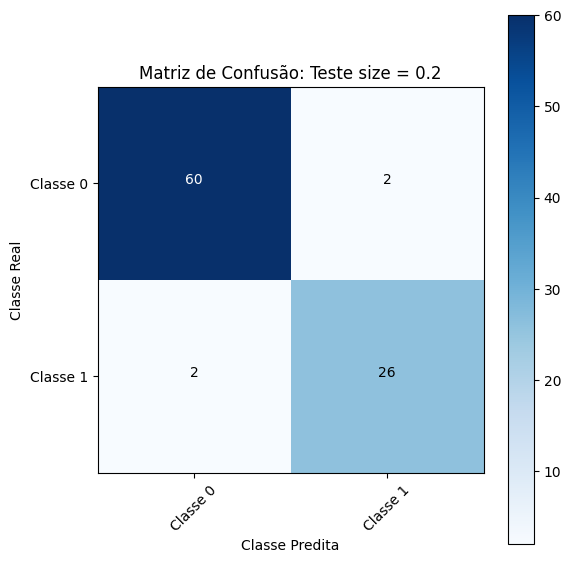

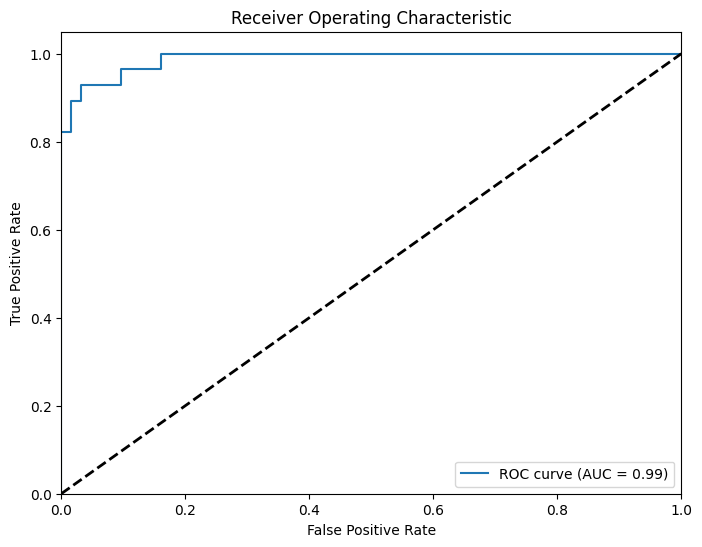

ROC_AUC: 0.988479262672811
Classe 01: {'precision': 0.9285714285714286, 'recall': 0.9285714285714286, 'f1-score': 0.9285714285714286, 'support': 28.0}


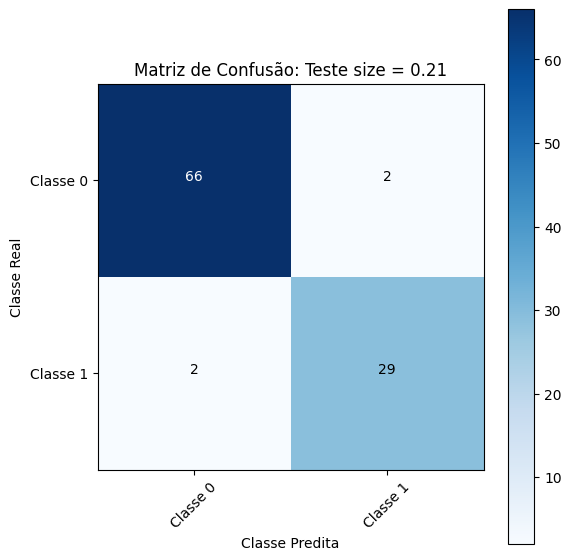

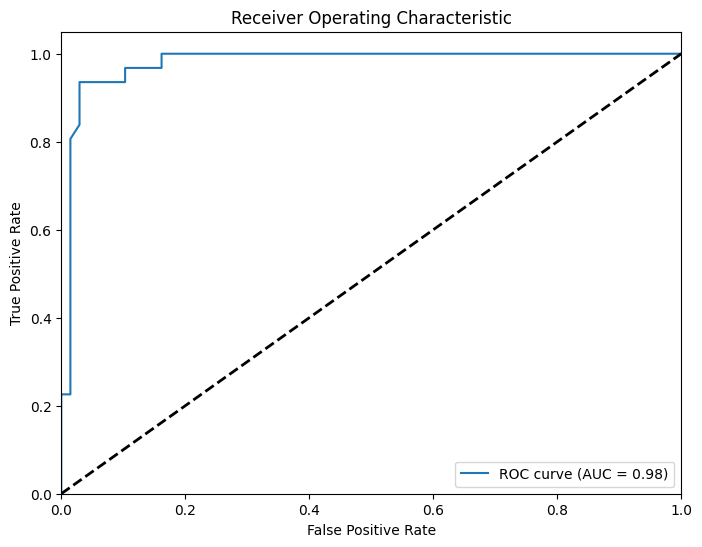

ROC_AUC: 0.9793643263757115
Classe 01: {'precision': 0.9354838709677419, 'recall': 0.9354838709677419, 'f1-score': 0.9354838709677419, 'support': 31.0}


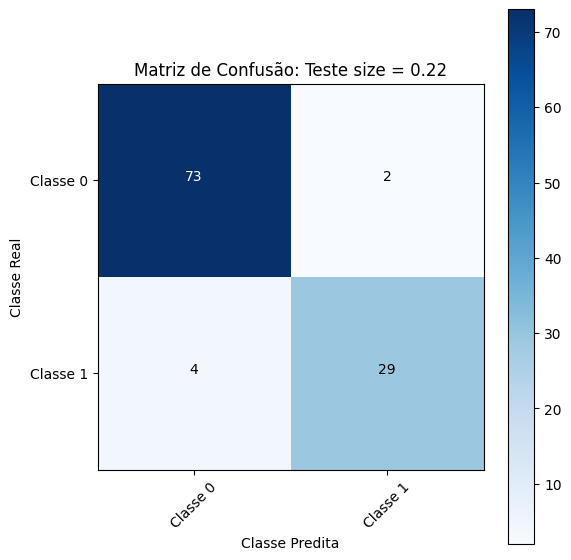

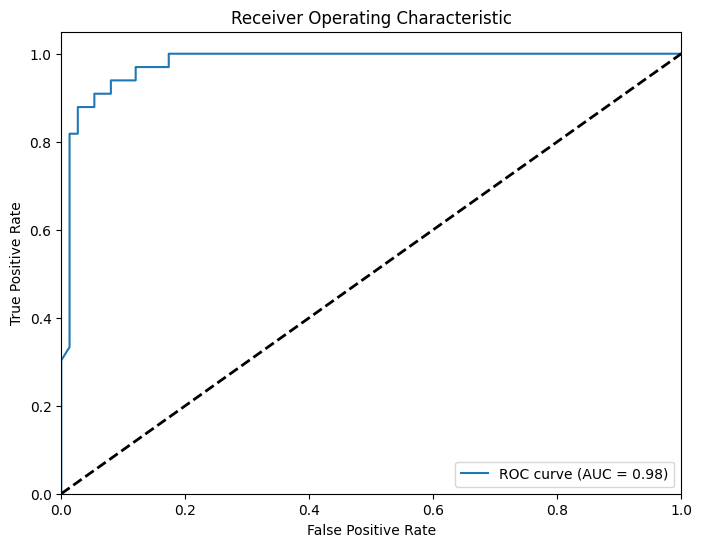

ROC_AUC: 0.9787878787878788
Classe 01: {'precision': 0.9354838709677419, 'recall': 0.8787878787878788, 'f1-score': 0.90625, 'support': 33.0}


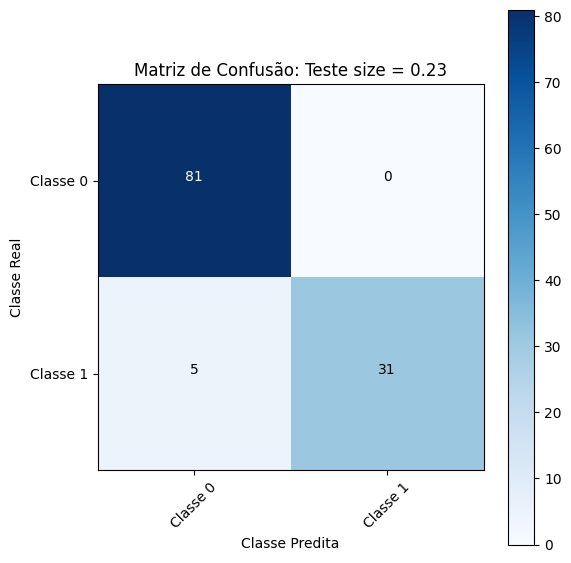

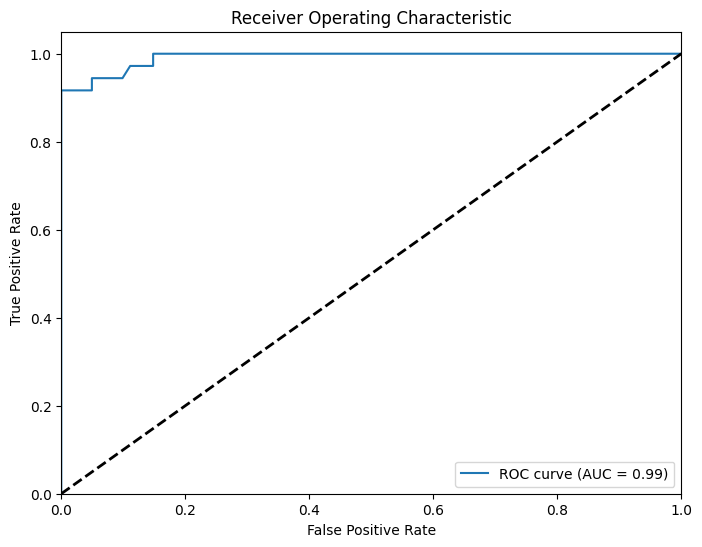

ROC_AUC: 0.9915980795610424
Classe 01: {'precision': 1.0, 'recall': 0.8611111111111112, 'f1-score': 0.9253731343283582, 'support': 36.0}


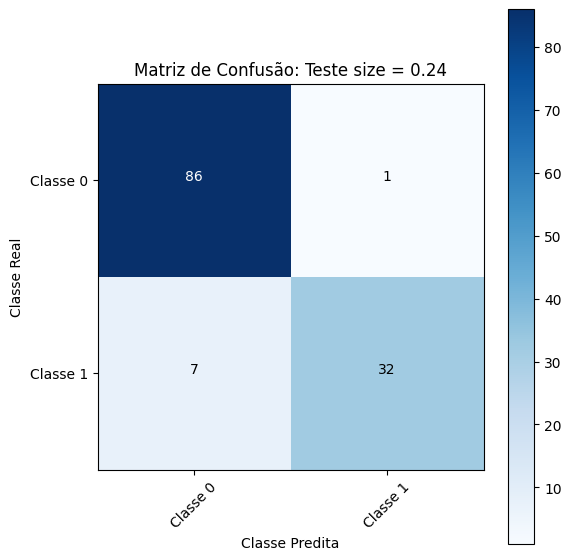

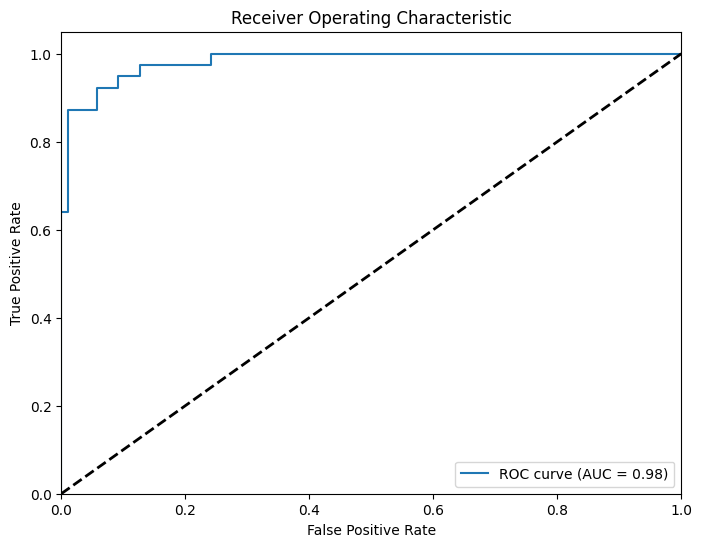

ROC_AUC: 0.9826112584733275
Classe 01: {'precision': 0.9696969696969697, 'recall': 0.8205128205128205, 'f1-score': 0.8888888888888888, 'support': 39.0}


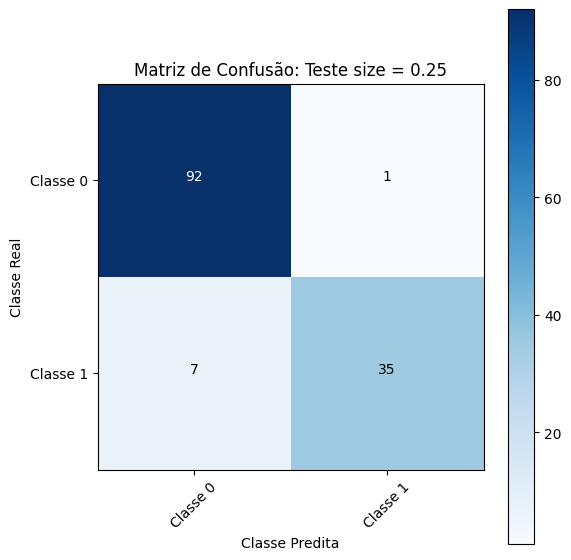

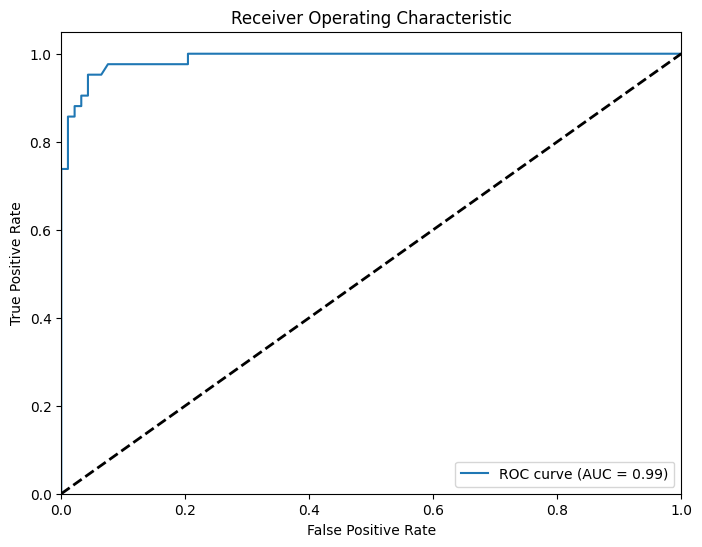

ROC_AUC: 0.988863287250384
Classe 01: {'precision': 0.9722222222222222, 'recall': 0.8333333333333334, 'f1-score': 0.8974358974358975, 'support': 42.0}


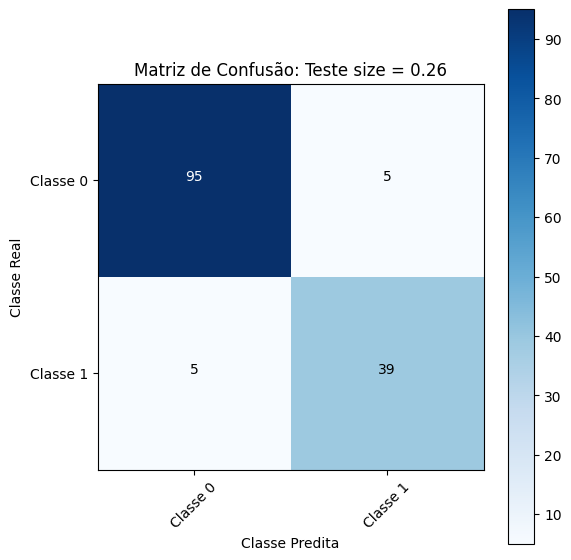

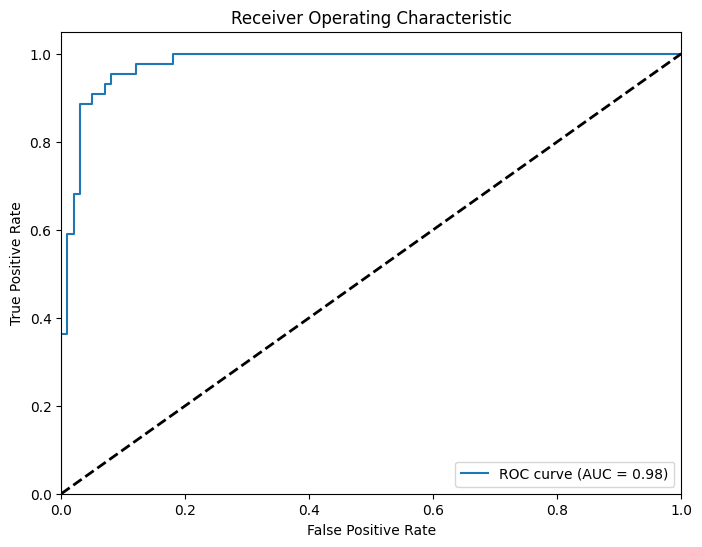

ROC_AUC: 0.978409090909091
Classe 01: {'precision': 0.8863636363636364, 'recall': 0.8863636363636364, 'f1-score': 0.8863636363636364, 'support': 44.0}


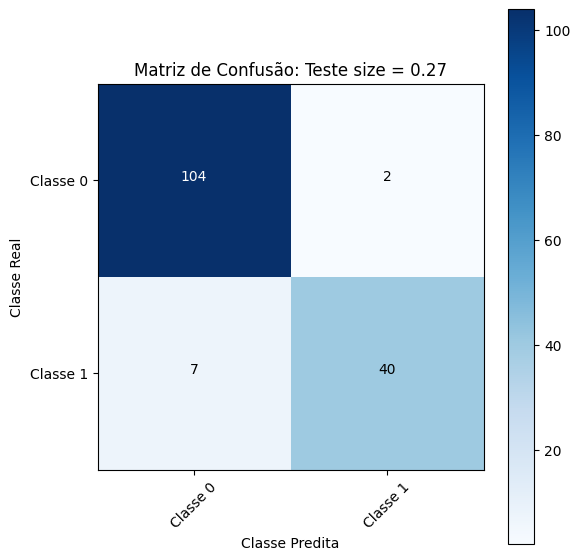

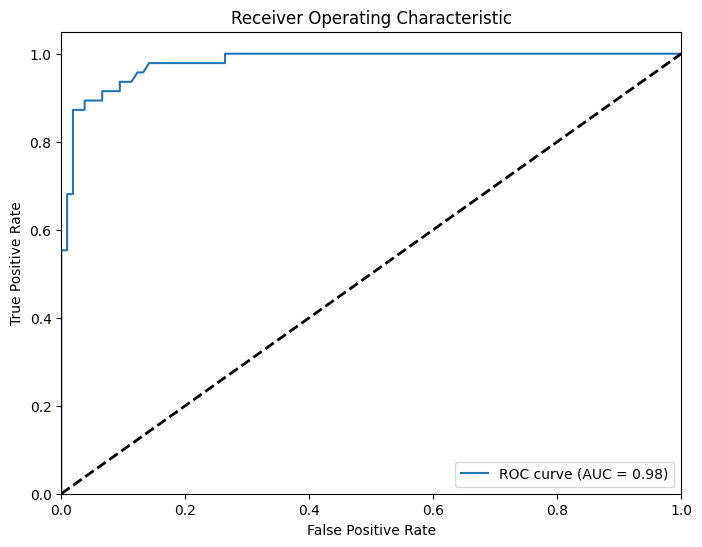

ROC_AUC: 0.9799277398635087
Classe 01: {'precision': 0.9523809523809523, 'recall': 0.851063829787234, 'f1-score': 0.898876404494382, 'support': 47.0}


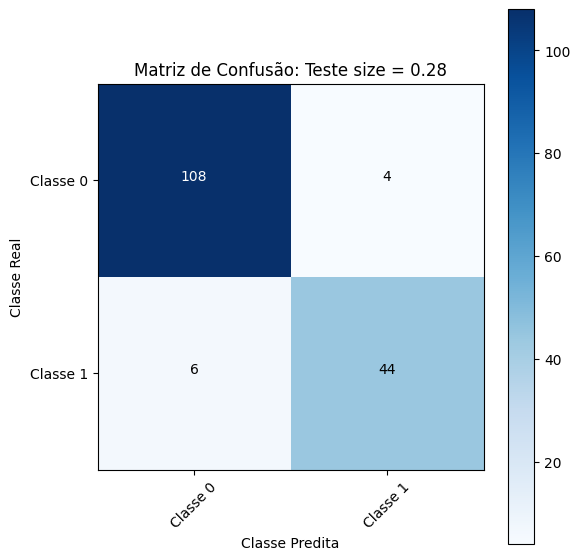

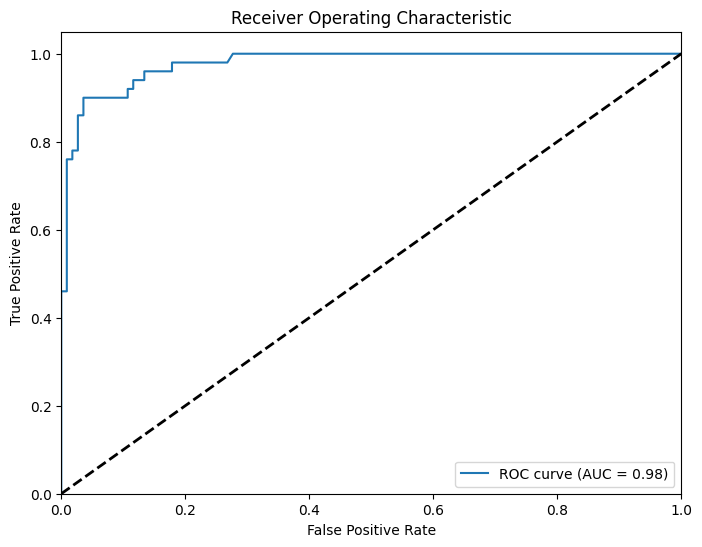

ROC_AUC: 0.9772321428571429
Classe 01: {'precision': 0.9166666666666666, 'recall': 0.88, 'f1-score': 0.8979591836734694, 'support': 50.0}


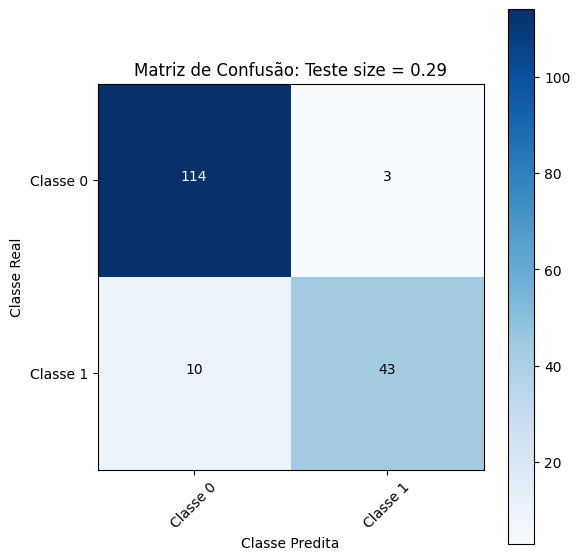

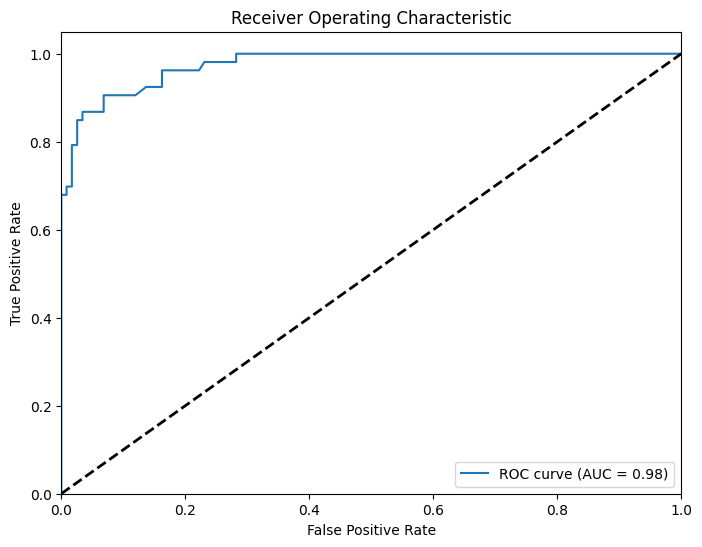

ROC_AUC: 0.9754071923883245
Classe 01: {'precision': 0.9347826086956522, 'recall': 0.8113207547169812, 'f1-score': 0.8686868686868687, 'support': 53.0}


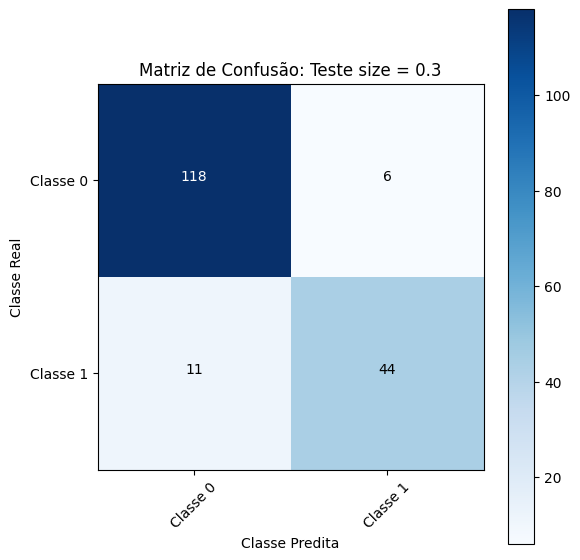

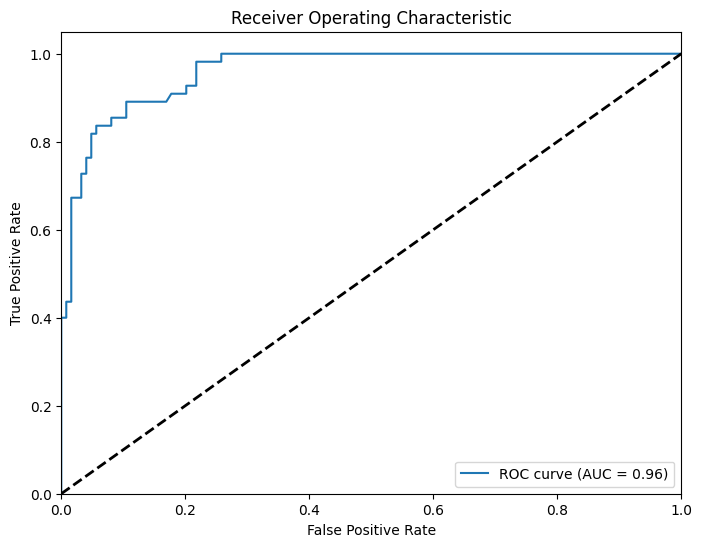

ROC_AUC: 0.9603372434017594
Classe 01: {'precision': 0.88, 'recall': 0.8, 'f1-score': 0.8380952380952381, 'support': 55.0}


,Amostragem N,Teor Treino,Teor Teste,Teor Validação,Precisão C1,Recall C1,Métrica_F1 C1,ROC-AUC index,Cross_Validation_Score
1,31.000,0.790,0.110,0.100,0.935,0.935,0.935,0.979,0.831
0,28.000,0.800,0.100,0.100,0.929,0.929,0.929,0.988,0.825
3,36.000,0.770,0.130,0.100,1.000,0.861,0.925,0.992,0.814
2,33.000,0.780,0.120,0.100,0.935,0.879,0.906,0.979,0.829
7,47.000,0.730,0.170,0.100,0.952,0.851,0.899,0.980,0.813
8,50.000,0.720,0.180,0.100,0.917,0.880,0.898,0.977,0.802
5,42.000,0.750,0.150,0.100,0.972,0.833,0.897,0.989,0.818
4,39.000,0.760,0.140,0.100,0.970,0.821,0.889,0.983,0.835
6,44.000,0.740,0.160,0.100,0.886,0.886,0.886,0.978,0.808
9,53.000,0.710,0.190,0.100,0.935,0.811,0.869,0.975,0.825


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

lista_precision = []
lista_f1 = []
lista_amostra_n = []
lista_recall = []
lista_teste_size = []
lista_rocauc = []
lista_teor_treino = []
lista_teor_validacao = []
lista_cross_val_mean = []
# Features fixas
fixed_features =  [
    'DBO',
    'Clorofila',
    'Nitratos',
    'SolDissolvidosTotais']

# Selecionar features e classe
X = df_aphanocapsa_0e1[fixed_features]
y = df_aphanocapsa_0e1['Classe']

for TSize in [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]:
  # Dividir os dados
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=TSize, stratify=y, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/TSize), stratify=y_temp, random_state=42)

  # Configurar o modelo
  rf_model = RandomForestClassifier(random_state=42)

  # Validação Cruzada no conjunto de treino
  cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')  # Usando F1-score
  mean_cv_score = np.mean(cv_scores)
  lista_cross_val_mean.append(mean_cv_score)

  # Treinar o modelo
  rf_model.fit(X_train, y_train)

  # Previsões no conjunto de teste
  y_pred = rf_model.predict(X_test)
  y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

  # Matriz de Confusão
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6, 6))
  plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(f'Matriz de Confusão: Teste size = {str(TSize)}')
  plt.colorbar()
  classes = ['Classe 0', 'Classe 1']
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  thresh = conf_matrix.max() / 2.
  for i, j in np.ndindex(conf_matrix.shape):
      plt.text(j, i, format(conf_matrix[i, j], 'd'),
              horizontalalignment="center",
              color="white" if conf_matrix[i, j] > thresh else "black")

  plt.ylabel('Classe Real')
  plt.xlabel('Classe Predita')
  plt.tight_layout()
  plt.show()

  # Curva ROC AUC
  fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

  # Relatório de Classificação
  results = {
      'AUC': roc_auc,
      'Classification Report': classification_report(y_test, y_pred, output_dict=True)
  }

  print("ROC_AUC: "+str(results['AUC']))
  print("Classe 01: "+str(results['Classification Report']['1']))
  lista_precision.append(results['Classification Report']['1']['precision'])
  lista_recall.append(results['Classification Report']['1']['recall'])
  lista_f1.append(results['Classification Report']['1']['f1-score'])
  lista_amostra_n.append(results['Classification Report']['1']['support'])
  lista_teste_size.append(TSize*(1-(0.1/TSize)))
  lista_teor_treino.append(1-TSize)
  lista_rocauc.append(results['AUC'])
  lista_teor_validacao.append(0.1)

df_final_metricas = pd.DataFrame()
df_final_metricas['Amostragem N'] = pd.DataFrame(lista_amostra_n)
df_final_metricas['Teor Treino'] = pd.DataFrame(lista_teor_treino)
df_final_metricas['Teor Teste'] = pd.DataFrame(lista_teste_size)
df_final_metricas['Teor Validação'] = pd.DataFrame(lista_teor_validacao)
df_final_metricas['Precisão C1'] = pd.DataFrame(lista_precision)
df_final_metricas['Recall C1'] = pd.DataFrame(lista_recall)
df_final_metricas['Métrica_F1 C1'] = pd.DataFrame(lista_f1)
df_final_metricas['ROC-AUC index'] = pd.DataFrame(lista_rocauc)
df_final_metricas['Cross_Validation_Score'] = pd.DataFrame(lista_cross_val_mean)  # Adicionar CV score

df_final_metricas.sort_values(by='Métrica_F1 C1', ascending=False)

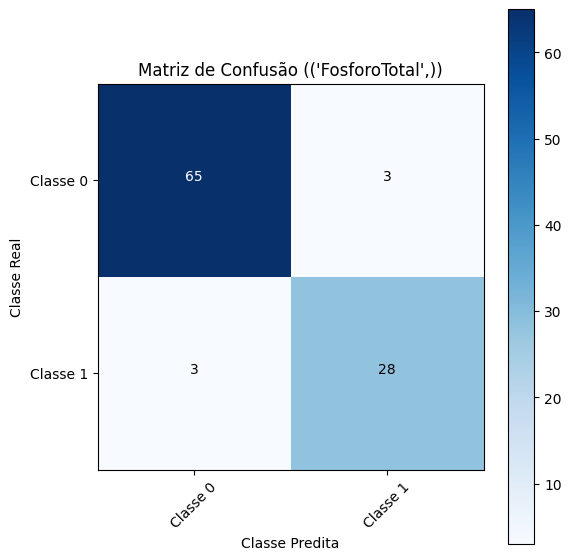

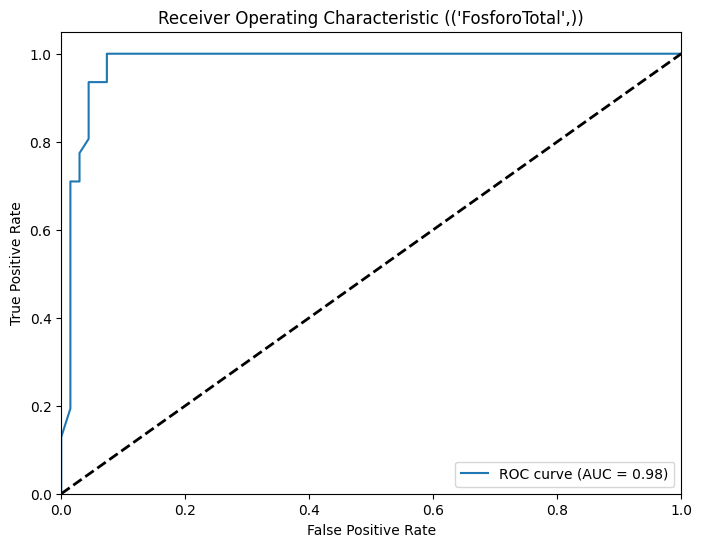

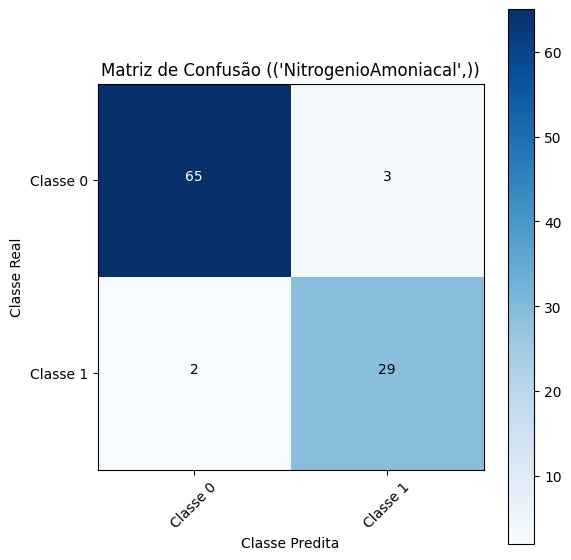

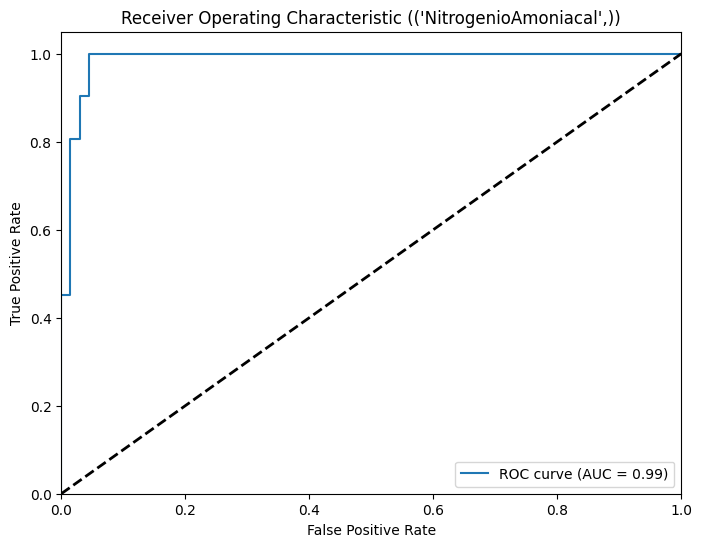

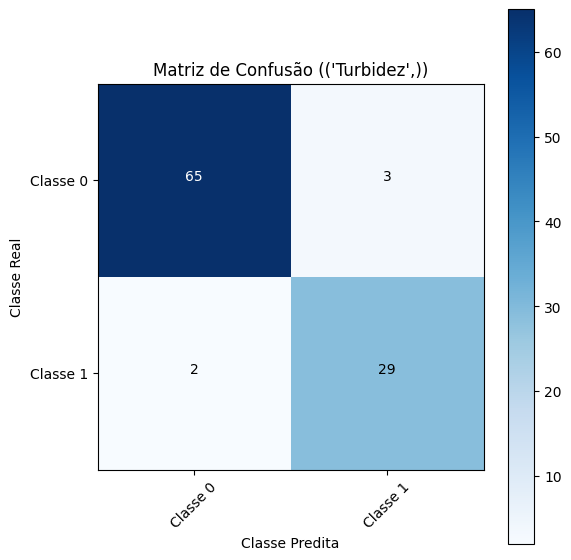

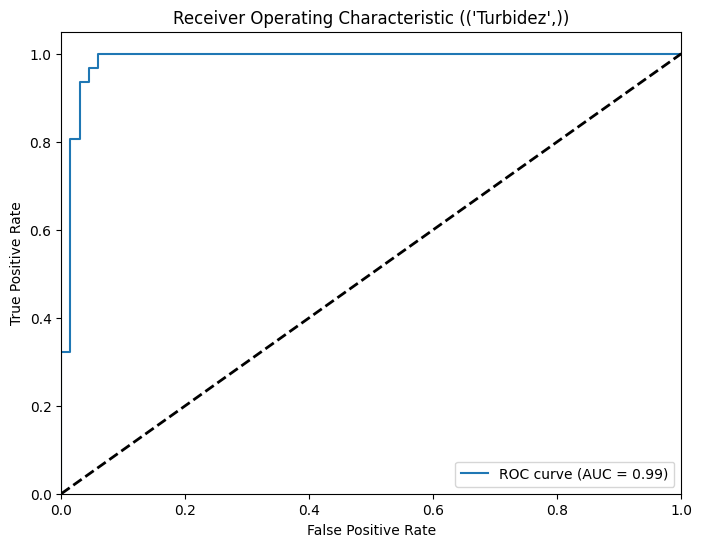

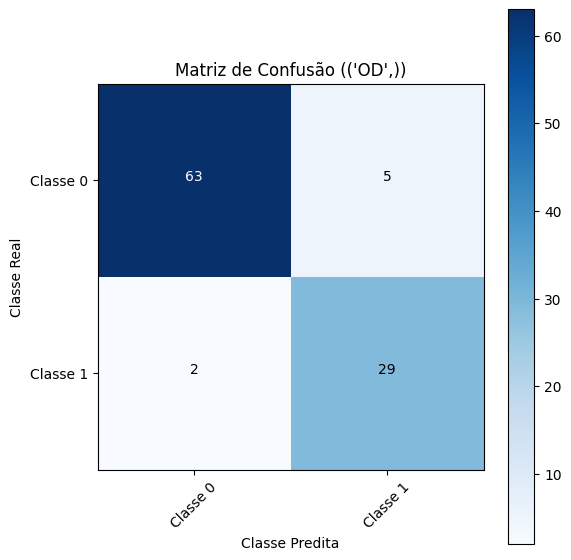

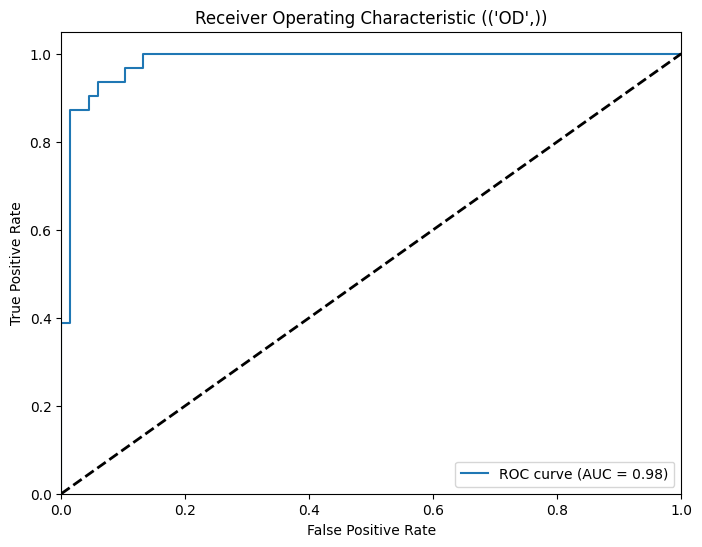

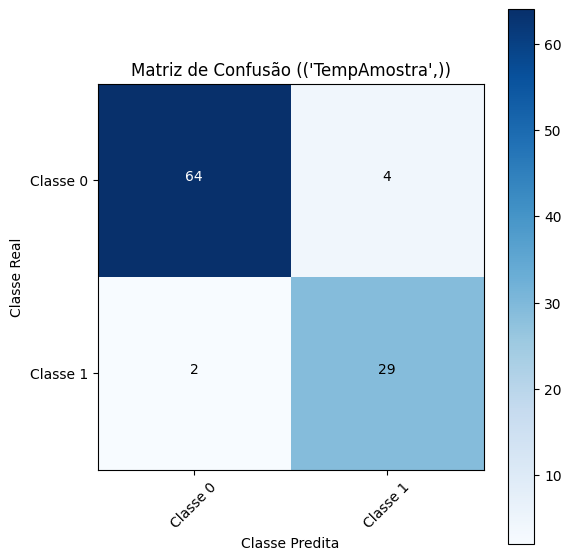

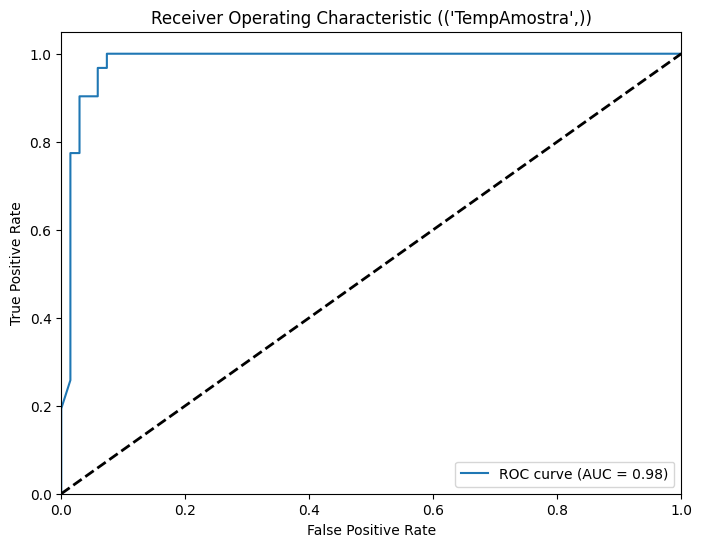

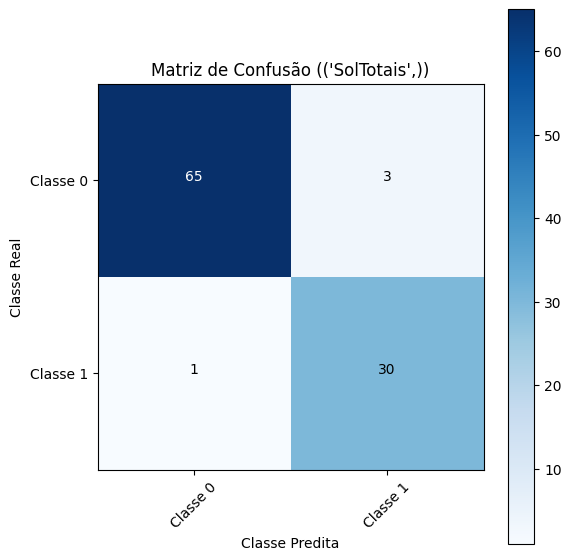

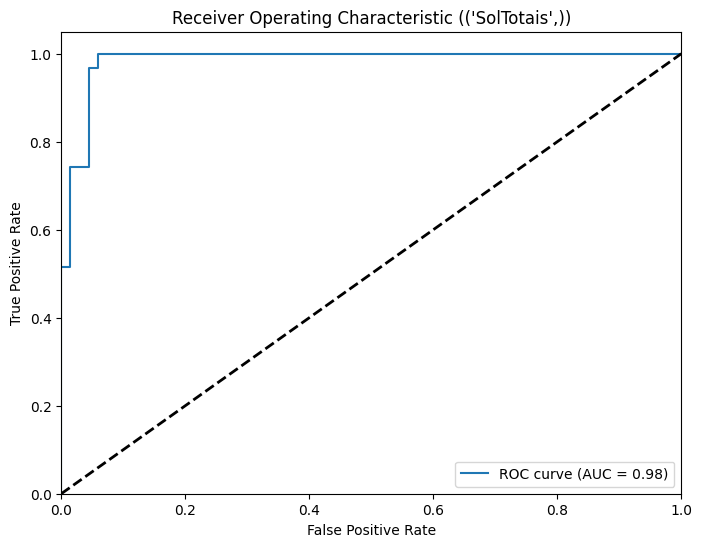

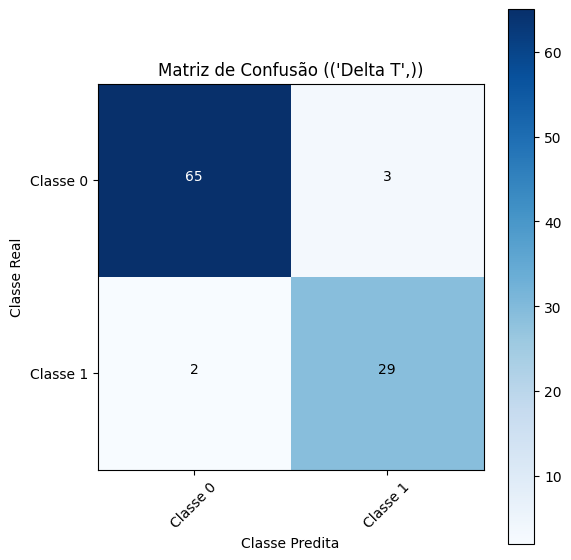

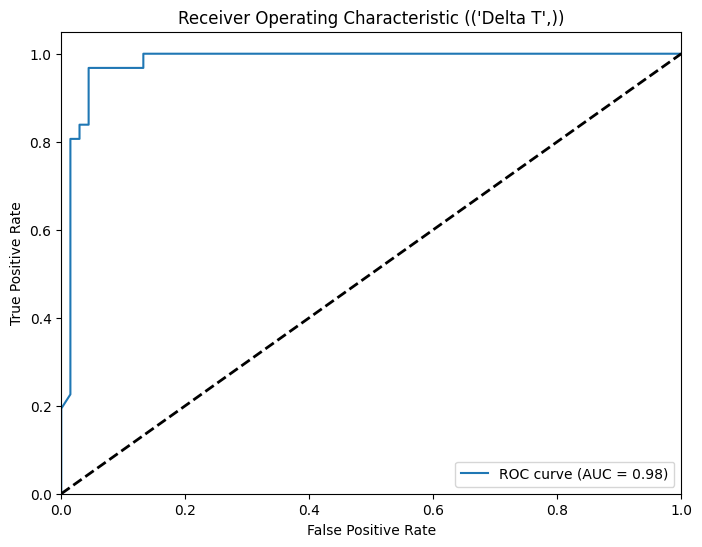

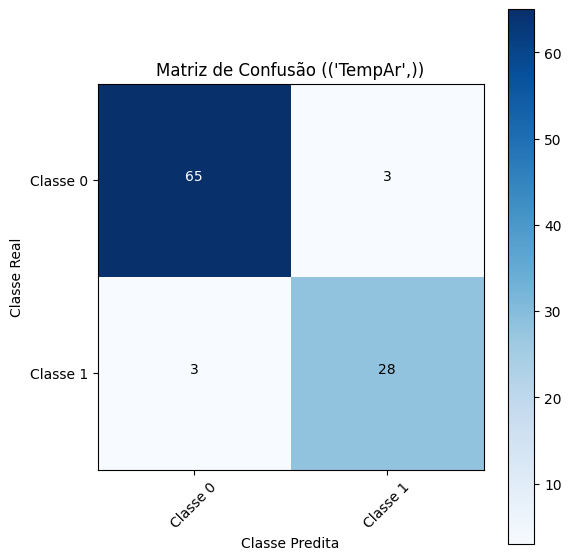

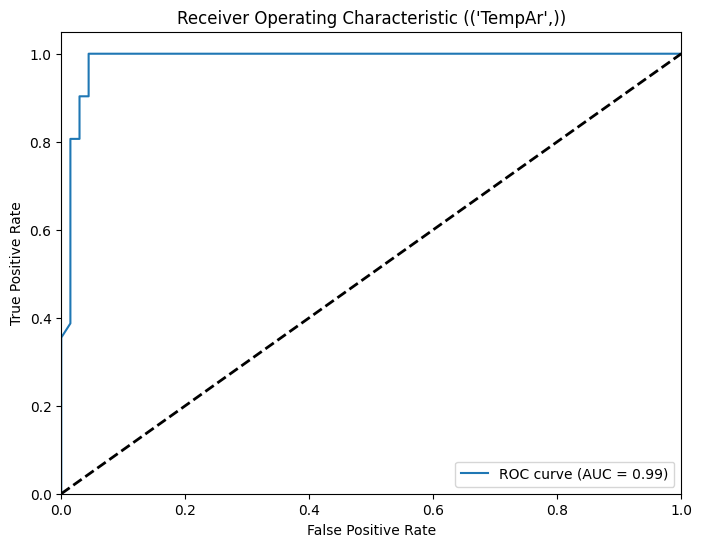

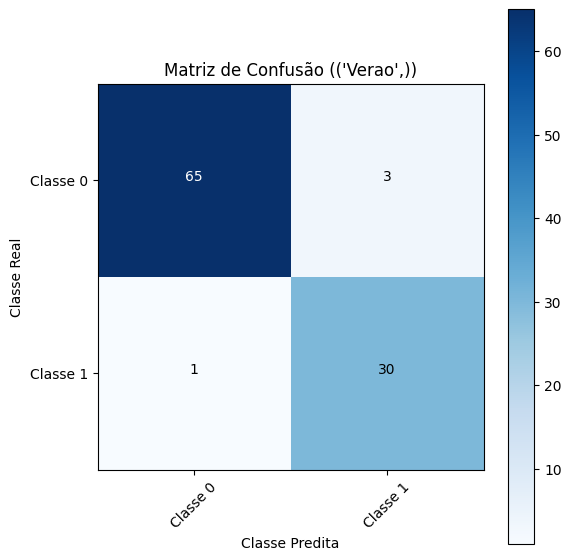

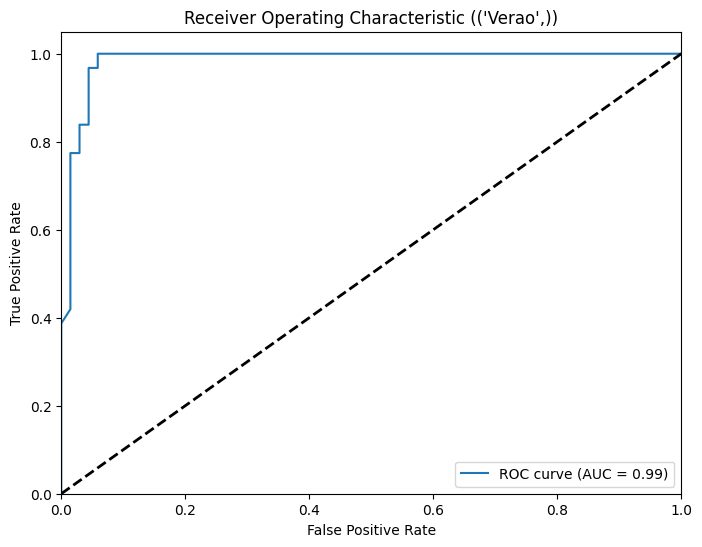

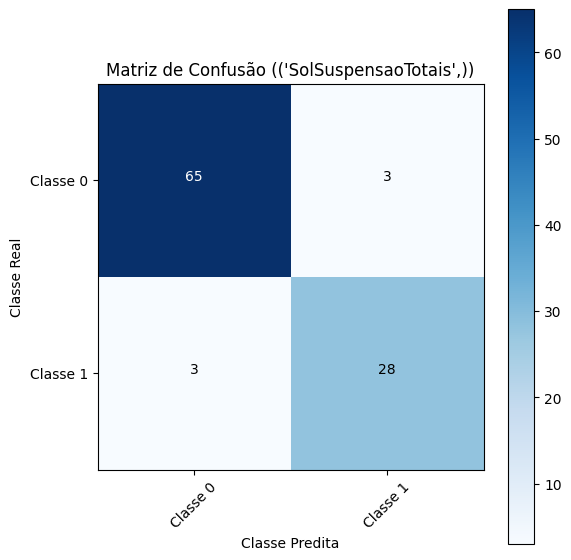

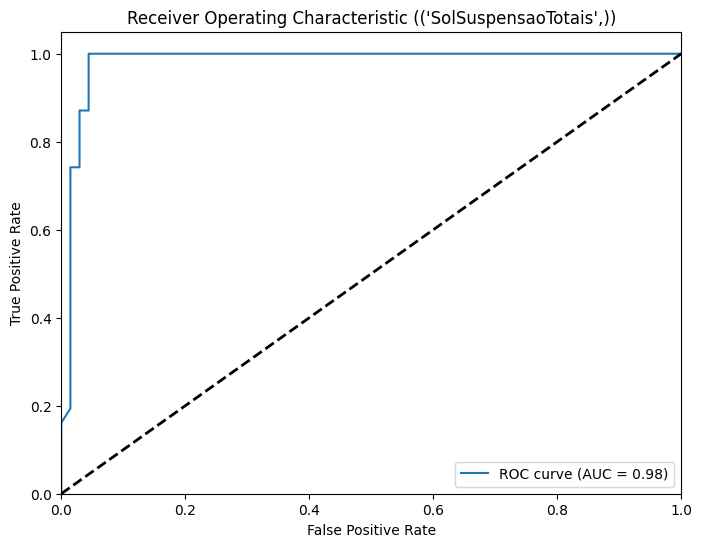

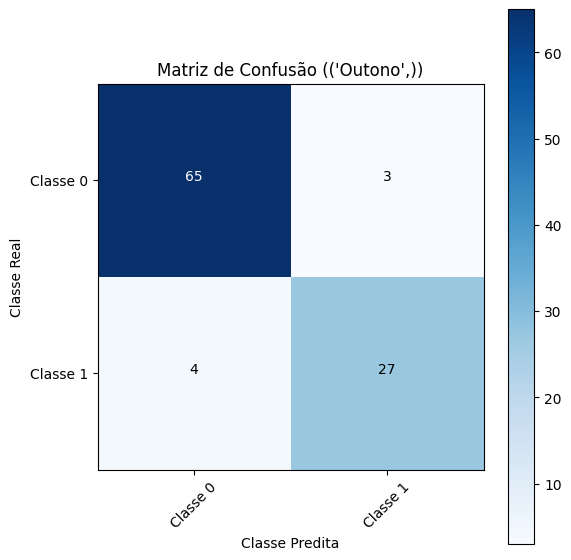

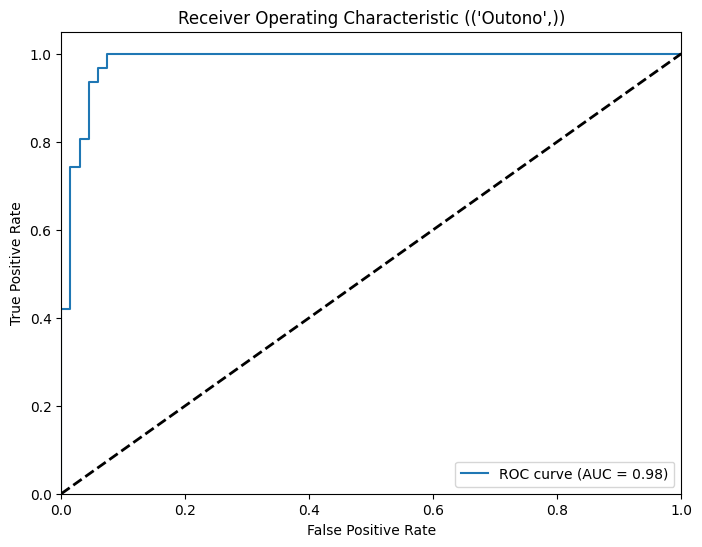

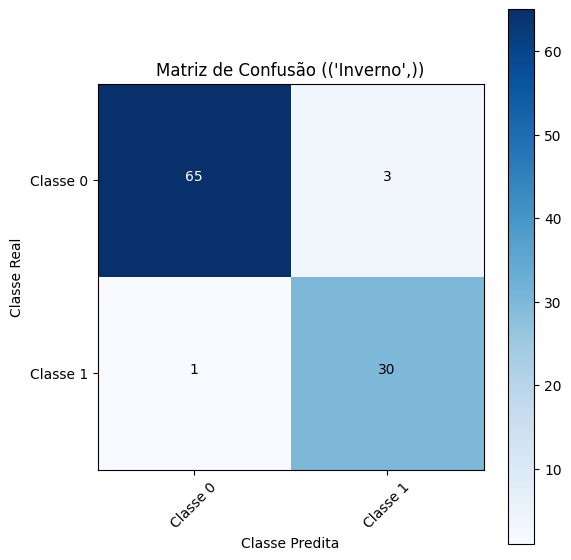

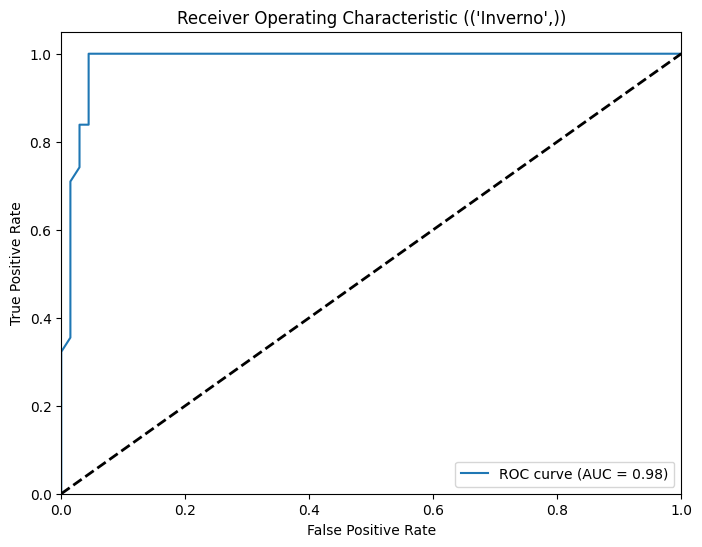

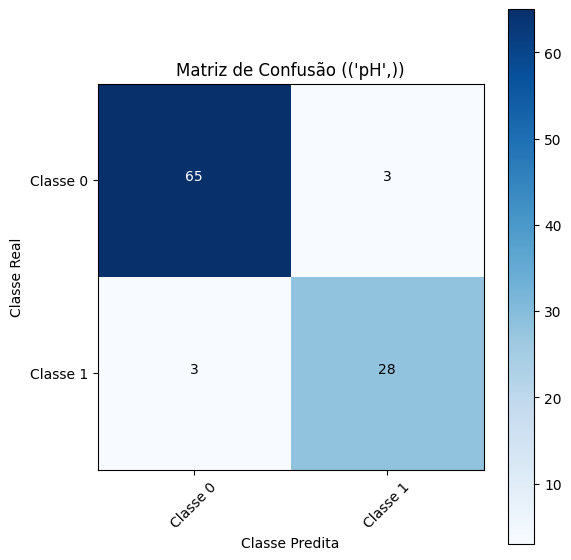

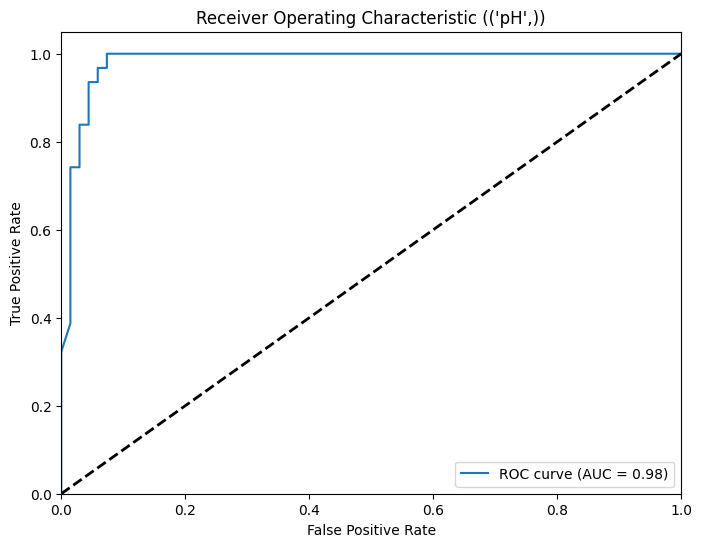

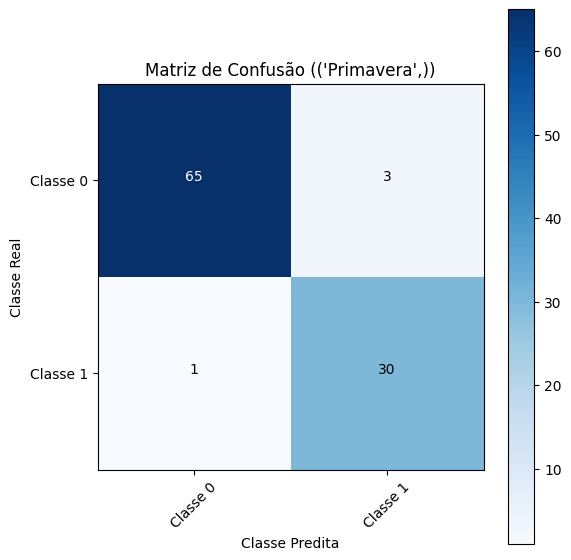

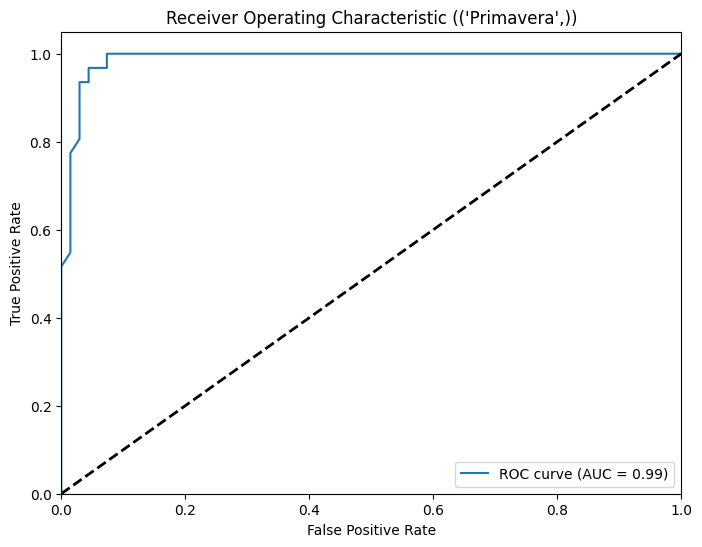

,Feature,Amostragem N,Teor Treino,Teor Teste,Teor Validação,Precisão C1,Recall C1,Métrica_F1 C1,ROC-AUC index,Cross_Validation_Score
5,SolTotais,31.000,0.790,0.110,0.100,0.909,0.968,0.938,0.985,0.846
8,Verao,31.000,0.790,0.110,0.100,0.909,0.968,0.938,0.985,0.842
11,Inverno,31.000,0.790,0.110,0.100,0.909,0.968,0.938,0.984,0.853
13,Primavera,31.000,0.790,0.110,0.100,0.909,0.968,0.938,0.988,0.851
1,NitrogenioAmoniacal,31.000,0.790,0.110,0.100,0.906,0.935,0.921,0.988,0.853
2,Turbidez,31.000,0.790,0.110,0.100,0.906,0.935,0.921,0.986,0.855
6,Delta T,31.000,0.790,0.110,0.100,0.906,0.935,0.921,0.980,0.852
4,TempAmostra,31.000,0.790,0.110,0.100,0.879,0.935,0.906,0.982,0.849
0,FosforoTotal,31.000,0.790,0.110,0.100,0.903,0.903,0.903,0.978,0.848
7,TempAr,31.000,0.790,0.110,0.100,0.903,0.903,0.903,0.986,0.858


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

# Features fixas e variáveis para combinações
selected_features = ['DBO',
                     'Clorofila',
                     'Nitratos',
                     'SolDissolvidosTotais']
variable_features = perm_importance_df[~perm_importance_df['Feature'].isin(selected_features)]['Feature']

# Para armazenar os resultados
results = []
# Inicializar listas para armazenar resultados
lista_cross_val_mean = []
lista_precision = []
lista_recall = []
lista_f1 = []
lista_amostra_n = []
lista_teste_size = []
lista_teor_treino = []
lista_teor_validacao = []
lista_rocauc = []
i=0

# Loop pelas combinações das variáveis
for comb in itertools.combinations(variable_features, 1):
    selected_features = fixed_features + list(comb)
    X = df_aphanocapsa_0e1[selected_features]
    y = df_aphanocapsa_0e1['Classe']

    # Dividir os dados
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.21, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1-(0.1/0.21)), stratify=y_temp, random_state=42)

    # Configurar o modelo
    rf_model = RandomForestClassifier(random_state=42)

    # Treinar o modelo
    rf_model.fit(X_train, y_train)

    # Validação Cruzada no conjunto de treino
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')  # Usando F1-score
    mean_cv_score = np.mean(cv_scores)
    lista_cross_val_mean.append(mean_cv_score)

    # Previsões no conjunto de teste
    y_pred = rf_model.predict(X_test)
    y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão ({comb})')
    plt.colorbar()
    classes = ['Classe 0', 'Classe 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = conf_matrix.max() / 2.
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    plt.tight_layout()
    plt.show()

    # Curva ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({comb})')
    plt.legend(loc="lower right")
    plt.show()

    # Armazenar resultados
    results.append({
        'Combination': comb,
        'AUC': roc_auc,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    })


    lista_teste_size.append((0.21)*(1-(0.1/0.21)))
    lista_teor_treino.append(0.79)
    lista_teor_validacao.append(0.1)

i=0
while i<len(variable_features):
    lista_precision.append(results[i]['Classification Report']['1']['precision'])
    lista_recall.append(results[i]['Classification Report']['1']['recall'])
    lista_f1.append(results[i]['Classification Report']['1']['f1-score'])
    lista_amostra_n.append(results[i]['Classification Report']['1']['support'])
    lista_rocauc.append(results[i]['AUC'])
    i=i+1

# Criar o DataFrame final
df_final_metricas = pd.DataFrame()
df_final_metricas['Feature'] = pd.DataFrame(variable_features.to_list())
df_final_metricas['Amostragem N'] = pd.DataFrame(lista_amostra_n)
df_final_metricas['Teor Treino'] = pd.DataFrame(lista_teor_treino)
df_final_metricas['Teor Teste'] = pd.DataFrame(lista_teste_size)
df_final_metricas['Teor Validação'] = pd.DataFrame(lista_teor_validacao)
df_final_metricas['Precisão C1'] = pd.DataFrame(lista_precision)
df_final_metricas['Recall C1'] = pd.DataFrame(lista_recall)
df_final_metricas['Métrica_F1 C1'] = pd.DataFrame(lista_f1)
df_final_metricas['ROC-AUC index'] = pd.DataFrame(lista_rocauc)
df_final_metricas['Cross_Validation_Score'] = pd.DataFrame(lista_cross_val_mean)  # Adicionar CV score

# Ordenar pelo F1-Score
df_final_metricas.sort_values(by='Métrica_F1 C1', ascending=False)

In [36]:
results[1]

{'Combination': ('NitrogenioAmoniacal',),
 'AUC': 0.9876660341555976,
 'Classification Report': {'0': {'precision': 0.9701492537313433,
   'recall': 0.9558823529411765,
   'f1-score': 0.9629629629629629,
   'support': 68.0},
  '1': {'precision': 0.90625,
   'recall': 0.9354838709677419,
   'f1-score': 0.9206349206349206,
   'support': 31.0},
  'accuracy': 0.9494949494949495,
  'macro avg': {'precision': 0.9381996268656716,
   'recall': 0.9456831119544592,
   'f1-score': 0.9417989417989417,
   'support': 99.0},
  'weighted avg': {'precision': 0.9501403965023368,
   'recall': 0.9494949494949495,
   'f1-score': 0.9497087274865054,
   'support': 99.0}}}

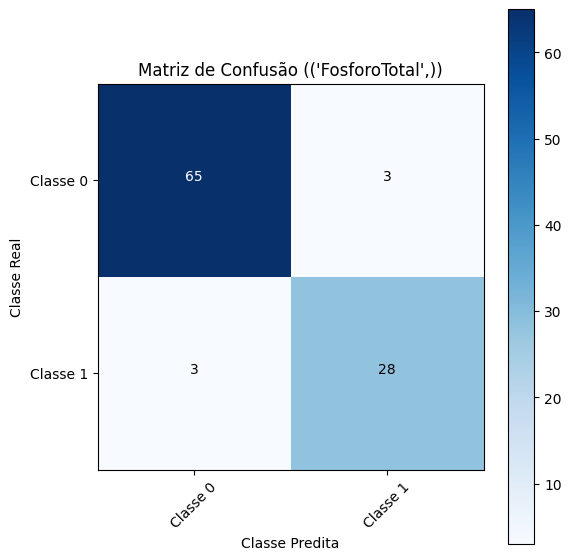

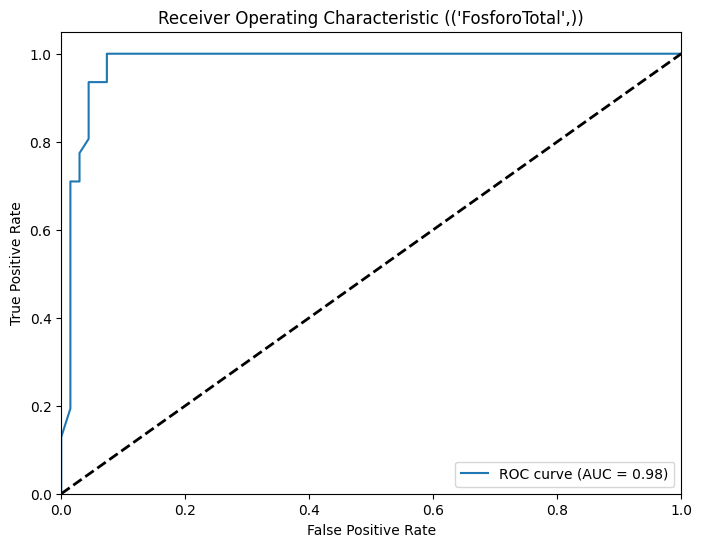

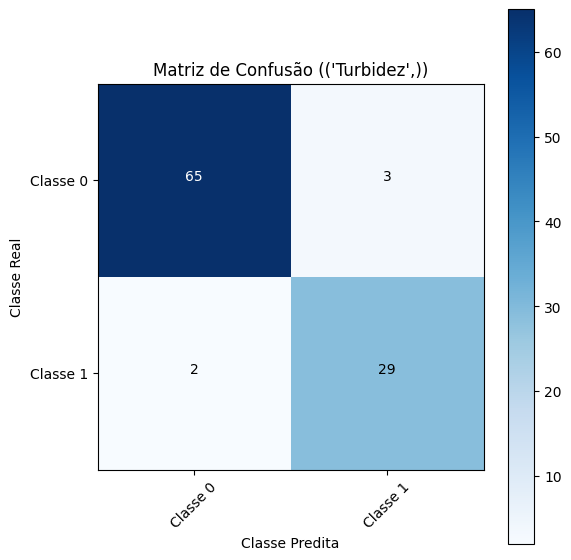

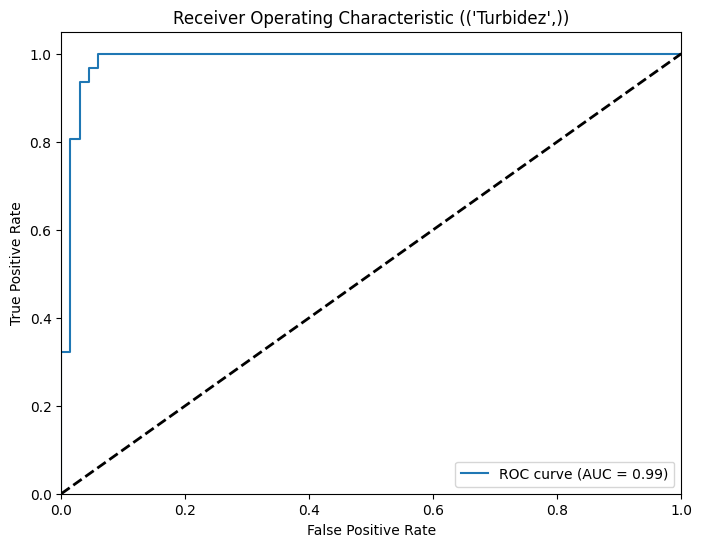

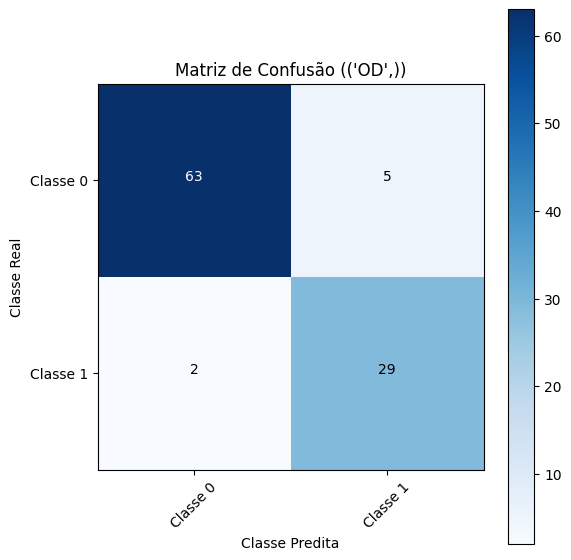

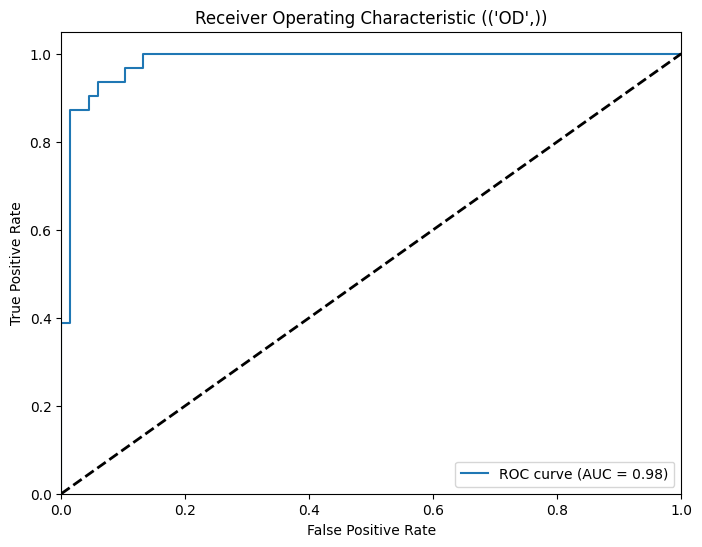

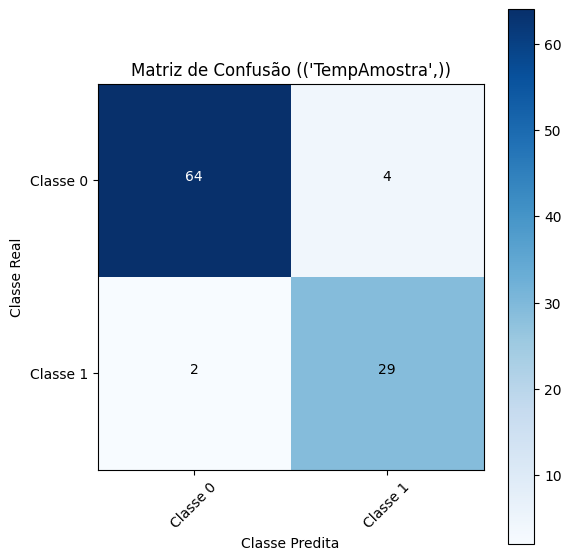

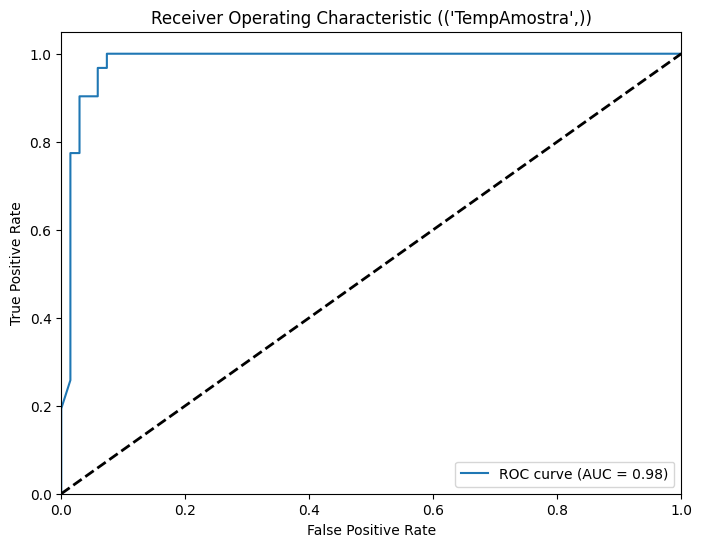

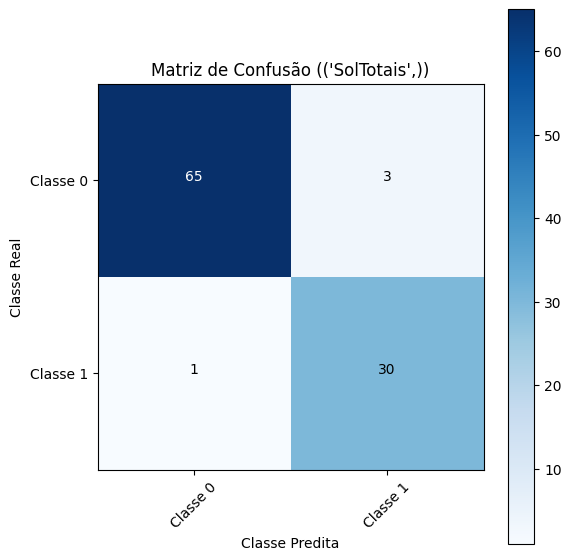

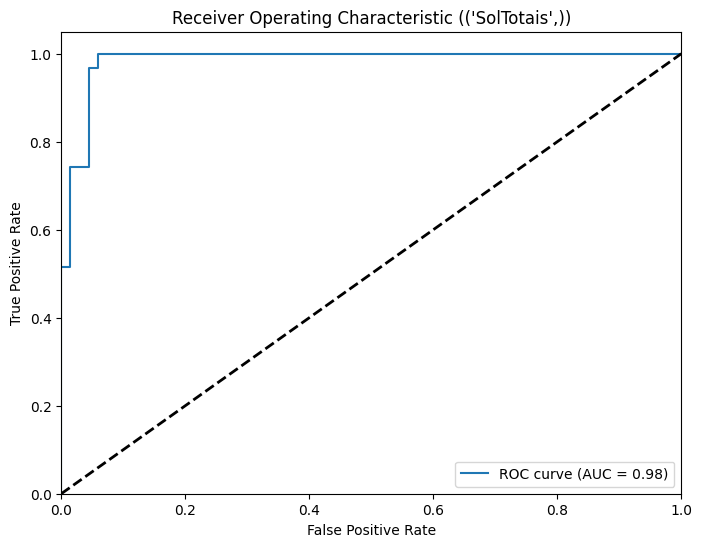

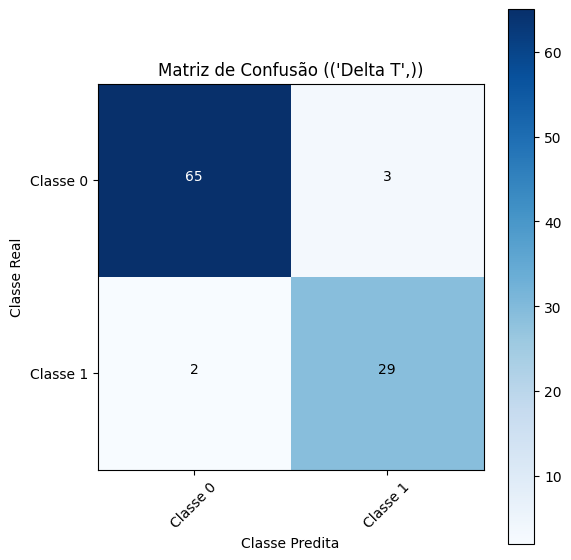

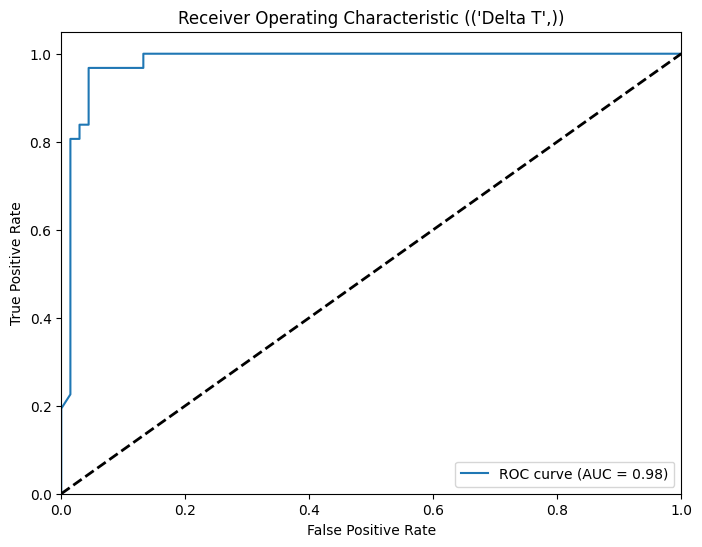

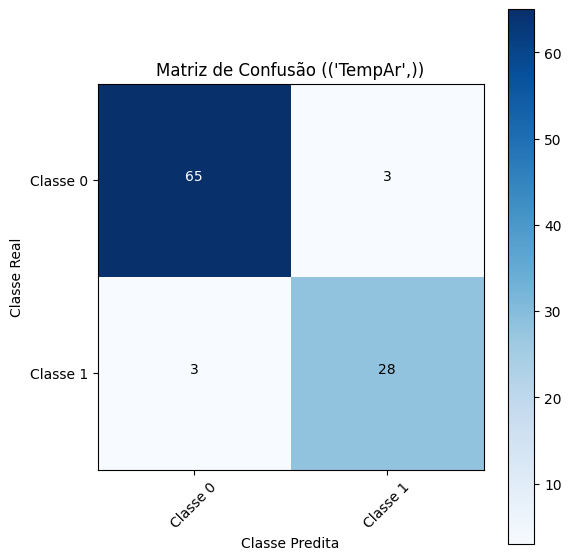

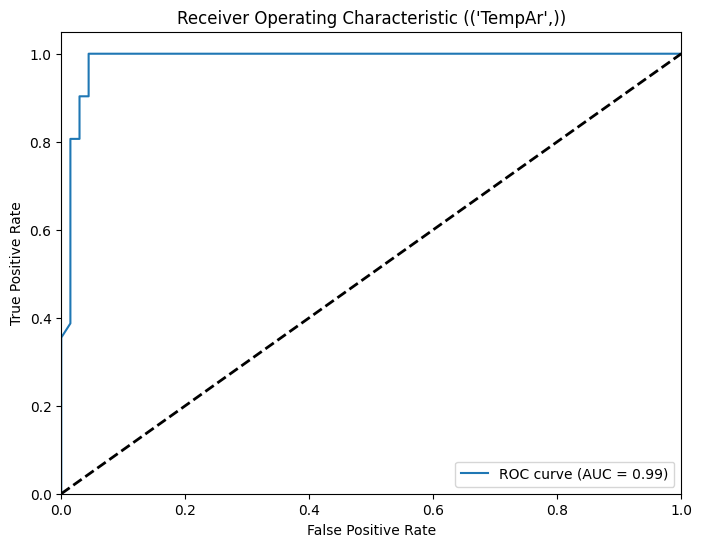

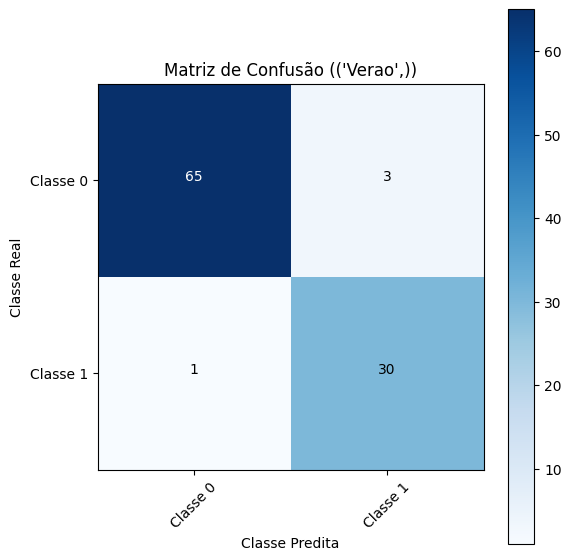

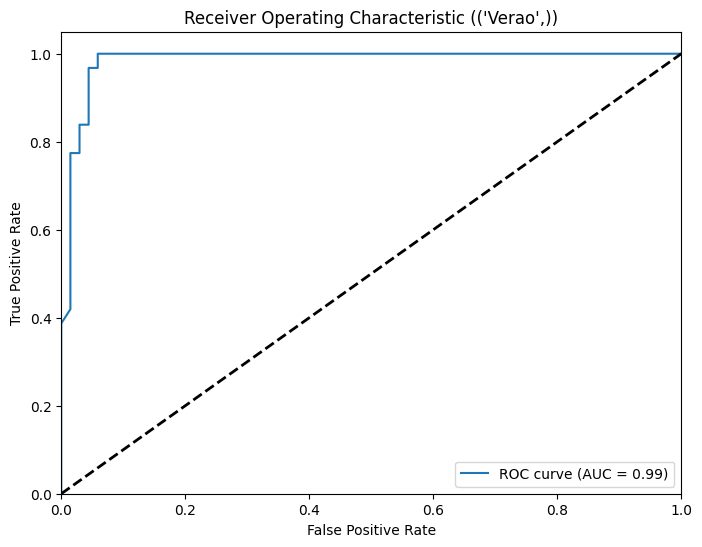

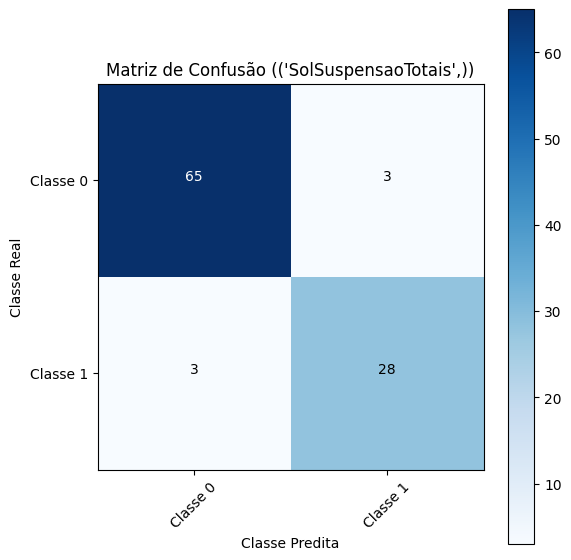

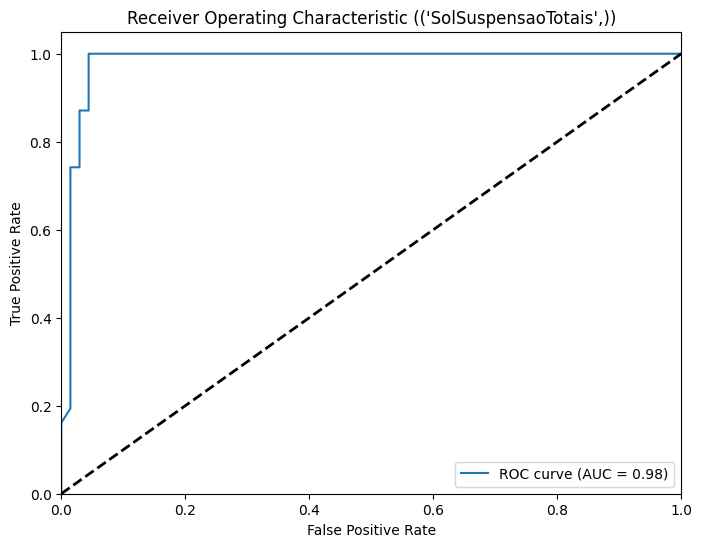

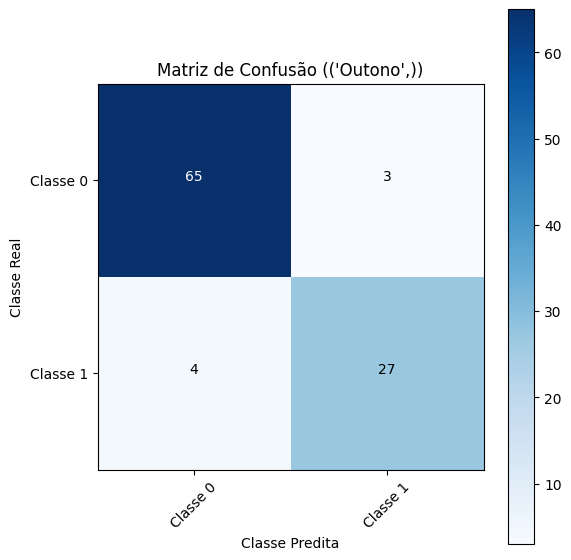

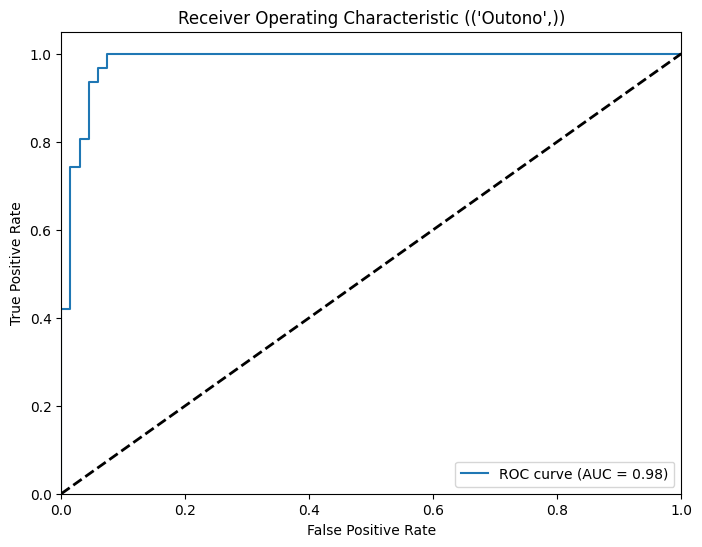

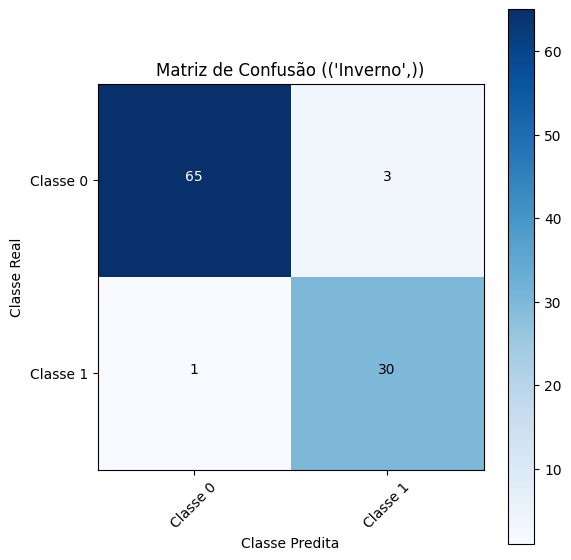

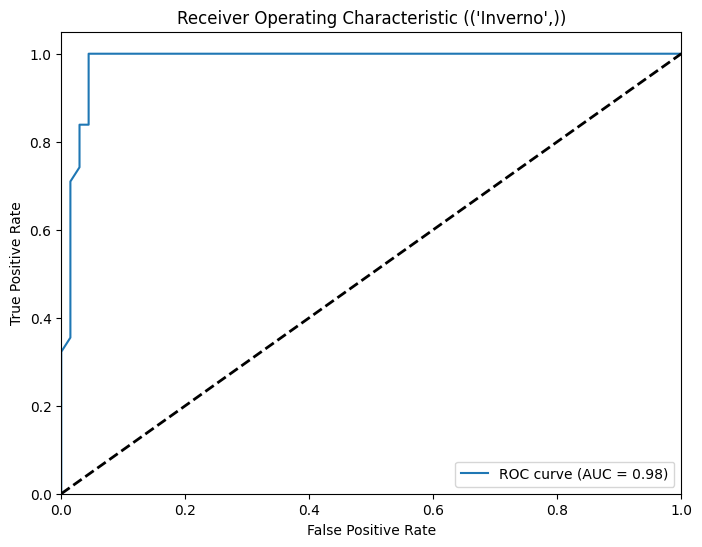

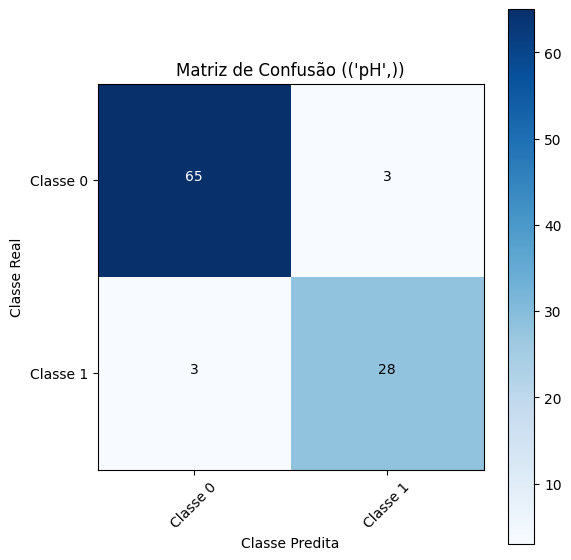

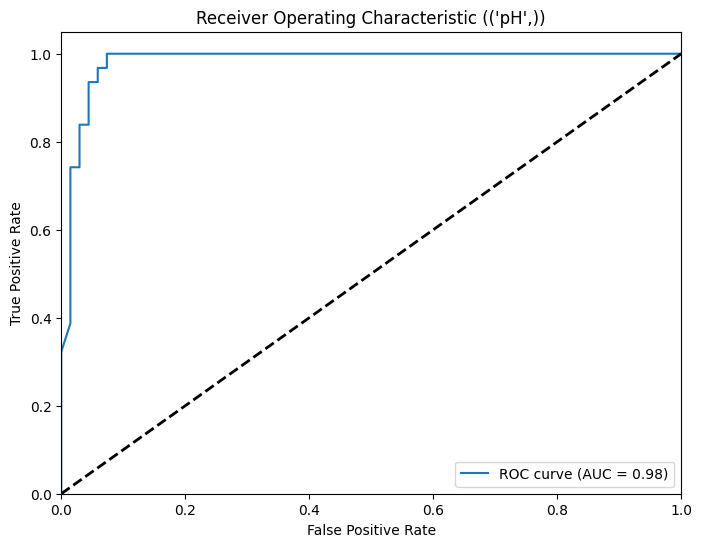

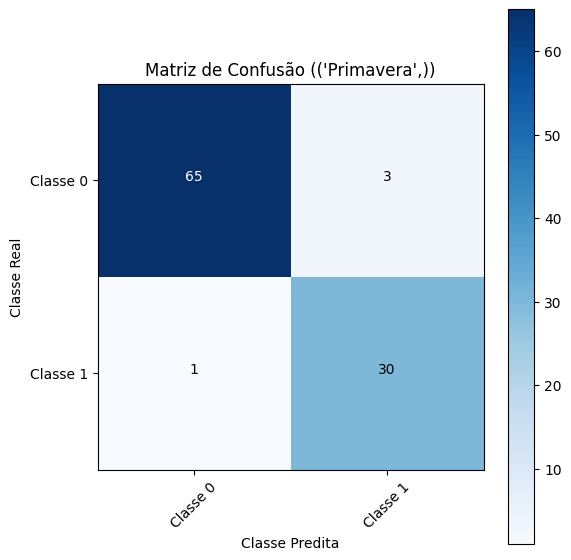

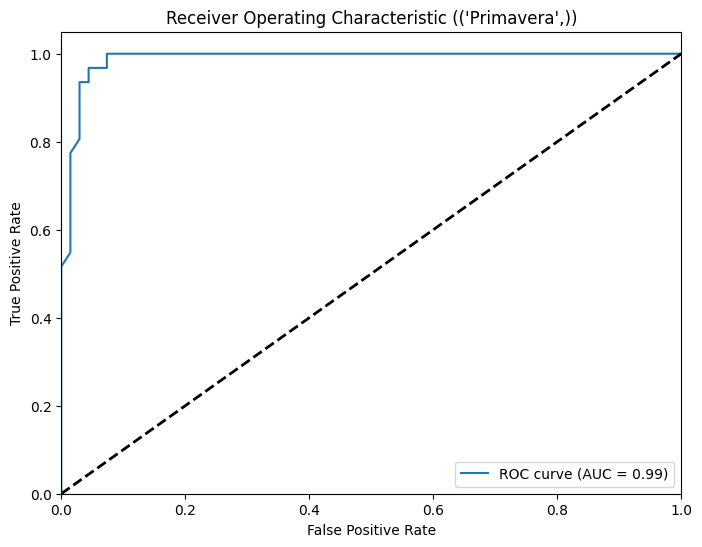

,Feature,Amostragem N,Teor Treino,Teor Teste,Teor Validação,Precisão C1,Recall C1,Métrica_F1 C1,ROC-AUC index,Cross_Validation_Score
4,SolTotais,31.000,0.790,0.110,0.100,0.909,0.968,0.938,0.985,0.846
7,Verao,31.000,0.790,0.110,0.100,0.909,0.968,0.938,0.985,0.842
10,Inverno,31.000,0.790,0.110,0.100,0.909,0.968,0.938,0.984,0.853
12,Primavera,31.000,0.790,0.110,0.100,0.909,0.968,0.938,0.988,0.851
1,Turbidez,31.000,0.790,0.110,0.100,0.906,0.935,0.921,0.986,0.855
5,Delta T,31.000,0.790,0.110,0.100,0.906,0.935,0.921,0.980,0.852
3,TempAmostra,31.000,0.790,0.110,0.100,0.879,0.935,0.906,0.982,0.849
0,FosforoTotal,31.000,0.790,0.110,0.100,0.903,0.903,0.903,0.978,0.848
6,TempAr,31.000,0.790,0.110,0.100,0.903,0.903,0.903,0.986,0.858
8,SolSuspensaoTotais,31.000,0.790,0.110,0.100,0.903,0.903,0.903,0.982,0.844


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

# Features fixas e variáveis para combinações
selected_features = ['DBO',
                     'Clorofila',
                     'Nitratos',
                     'SolDissolvidosTotais',
                     'NitrogenioAmoniacal']
variable_features = perm_importance_df[~perm_importance_df['Feature'].isin(selected_features)]['Feature']

# Para armazenar os resultados
results = []
# Inicializar listas para armazenar resultados
lista_cross_val_mean = []
lista_precision = []
lista_recall = []
lista_f1 = []
lista_amostra_n = []
lista_teste_size = []
lista_teor_treino = []
lista_teor_validacao = []
lista_rocauc = []
i=0

# Loop pelas combinações das variáveis
for comb in itertools.combinations(variable_features, 1):
    selected_features = fixed_features + list(comb)
    X = df_aphanocapsa_0e1[selected_features]
    y = df_aphanocapsa_0e1['Classe']

    # Dividir os dados
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.21, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1-(0.1/0.21)), stratify=y_temp, random_state=42)

    # Configurar o modelo
    rf_model = RandomForestClassifier(random_state=42)

    # Treinar o modelo
    rf_model.fit(X_train, y_train)

    # Validação Cruzada no conjunto de treino
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')  # Usando F1-score
    mean_cv_score = np.mean(cv_scores)
    lista_cross_val_mean.append(mean_cv_score)

    # Previsões no conjunto de teste
    y_pred = rf_model.predict(X_test)
    y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão ({comb})')
    plt.colorbar()
    classes = ['Classe 0', 'Classe 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = conf_matrix.max() / 2.
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    plt.tight_layout()
    plt.show()

    # Curva ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({comb})')
    plt.legend(loc="lower right")
    plt.show()

    # Armazenar resultados
    results.append({
        'Combination': comb,
        'AUC': roc_auc,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    })


    lista_teste_size.append((0.21)*(1-(0.1/0.21)))
    lista_teor_treino.append(0.79)
    lista_teor_validacao.append(0.1)

i=0
while i<len(variable_features):
    lista_precision.append(results[i]['Classification Report']['1']['precision'])
    lista_recall.append(results[i]['Classification Report']['1']['recall'])
    lista_f1.append(results[i]['Classification Report']['1']['f1-score'])
    lista_amostra_n.append(results[i]['Classification Report']['1']['support'])
    lista_rocauc.append(results[i]['AUC'])
    i=i+1

# Criar o DataFrame final
df_final_metricas = pd.DataFrame()
df_final_metricas['Feature'] = pd.DataFrame(variable_features.to_list())
df_final_metricas['Amostragem N'] = pd.DataFrame(lista_amostra_n)
df_final_metricas['Teor Treino'] = pd.DataFrame(lista_teor_treino)
df_final_metricas['Teor Teste'] = pd.DataFrame(lista_teste_size)
df_final_metricas['Teor Validação'] = pd.DataFrame(lista_teor_validacao)
df_final_metricas['Precisão C1'] = pd.DataFrame(lista_precision)
df_final_metricas['Recall C1'] = pd.DataFrame(lista_recall)
df_final_metricas['Métrica_F1 C1'] = pd.DataFrame(lista_f1)
df_final_metricas['ROC-AUC index'] = pd.DataFrame(lista_rocauc)
df_final_metricas['Cross_Validation_Score'] = pd.DataFrame(lista_cross_val_mean)  # Adicionar CV score

# Ordenar pelo F1-Score
df_final_metricas.sort_values(by='Métrica_F1 C1', ascending=False)

# SMOTE

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross Validation Scores: [0.88268156 0.92178771 0.93854749 0.91573034 0.93258427]
Cross Validation Mean Accuracy: 0.9183
Relatório de Classificação por Classe:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.91      0.97      0.94        31

    accuracy                           0.96        99
   macro avg       0.95      0.96      0.95        99
weighted avg       0.96      0.96      0.96        99



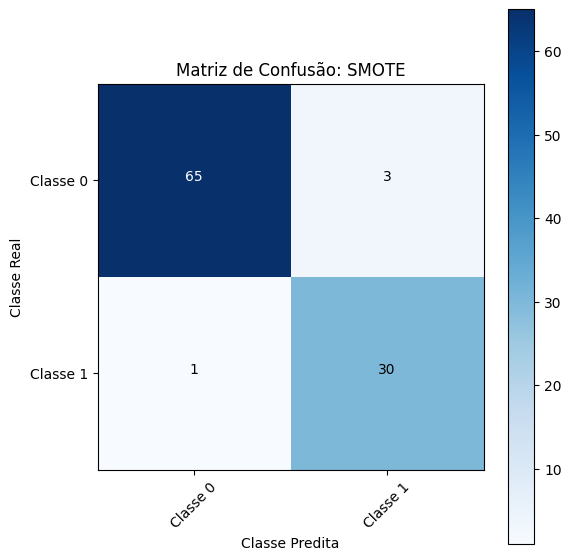

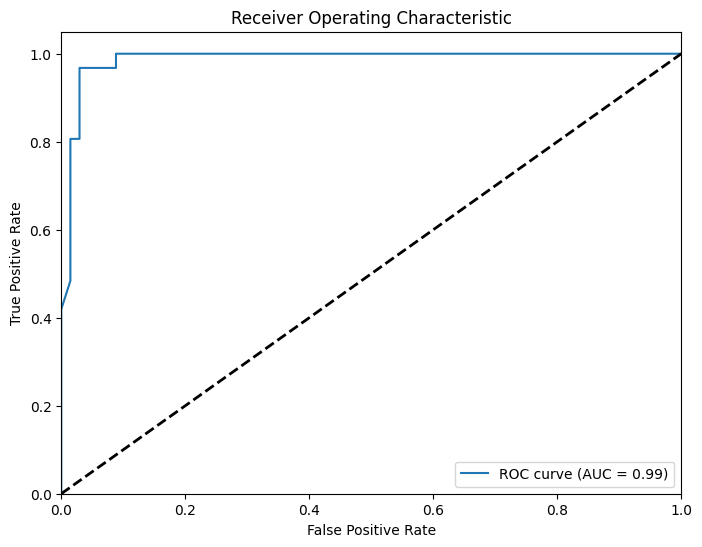

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Divisão dos dados antes do oversampling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

# Aplicar RandomOverSampling ou SMOTE
# Escolha o método de oversampling:
# oversampler = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)

# Aplicar oversampling nos dados de treino
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Configurar o modelo Random Forest
rf_model_smote = RandomForestClassifier(random_state=42)

# Treinar o modelo com dados balanceados
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# Previsões no conjunto de teste
y_pred = rf_model_smote.predict(X_test)

# Avaliar as métricas no conjunto de teste
metrics = {
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
}

metrics_df = pd.DataFrame(metrics, index=["Value"])

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC AUC
y_pred_prob = rf_model_smote.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model_smote, X, y, cv=cv, scoring="accuracy")

# Exibir a tabela com métricas
print("Cross Validation Scores:", cv_scores)
print(f"Cross Validation Mean Accuracy: {np.mean(cv_scores):.4f}")

# Relatório de Classificação por Classe
print("Relatório de Classificação por Classe:")
print(classification_report(y_test, y_pred))

# Plotar matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: SMOTE')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Plotar a curva ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
for feature in selected_features:

  X = df_aphanocapsa_0e1[[feature]]
  y = df_aphanocapsa_0e1['Classe']

  # Divisão dos dados antes do oversampling
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.21, stratify=y, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)
  oversampler = SMOTE(random_state=42)

  # Aplicar oversampling nos dados de treino
  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

  # Configurar o modelo Random Forest
  rf_model_smote = RandomForestClassifier(random_state=42, max_depth=3)

  # Treinar o modelo com dados balanceados
  rf_model_smote.fit(X_train_resampled, y_train_resampled)

  # Escolha uma árvore específica da floresta (ex: a primeira árvore)
  tree = rf_model_smote.estimators_[0]

  # Exportar a árvore para o formato DOT
  dot_data = export_graphviz(
      tree,
      out_file=None,
      feature_names=X.columns,
      class_names=['Classe 0', 'Classe 1'],
      filled=True,
      rounded=True,
      special_characters=True
  )

  file_name = f"Aphanocapsa sp.: {feature}-Representative_Decision_Tree"

  # Salvar o arquivo como PDF (ou outro formato suportado)
  graph = graphviz.Source(dot_data)
  graph.render(file_name, format='pdf', cleanup=True)  # Salva como PDF e remove arquivos temporários
  print(f"Árvore salva como: {file_name}.pdf")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Árvore salva como: Aphanocapsa sp.: DBO-Representative_Decision_Tree.pdf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Árvore salva como: Aphanocapsa sp.: Clorofila-Representative_Decision_Tree.pdf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Árvore salva como: Aphanocapsa sp.: FosforoTotal-Representative_Decision_Tree.pdf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Árvore salva como: Aphanocapsa sp.: SolDissolvidosTotais-Representative_Decision_Tree.pdf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Árvore salva como: Aphanocapsa sp.: Nitratos-Representative_Decision_Tree.pdf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Árvore salva como: Aphanocapsa sp.: pH-Representative_Decision_Tree.pdf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Árvore salva como: Aphanocapsa sp.: SolSuspensaoTotais-Representative_Decision_Tree.pdf


# RANDOMOVERSAMPLER

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Cross Validation Scores: [0.87777778 0.91111111 0.86666667 0.88764045 0.95505618 0.91011236
 0.93258427 0.91011236 0.96629213 0.95505618]
Cross Validation Mean Accuracy: 0.9172
Relatório de Classificação por Classe:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.91      0.97      0.94        31

    accuracy                           0.96        99
   macro avg       0.95      0.96      0.95        99
weighted avg       0.96      0.96      0.96        99



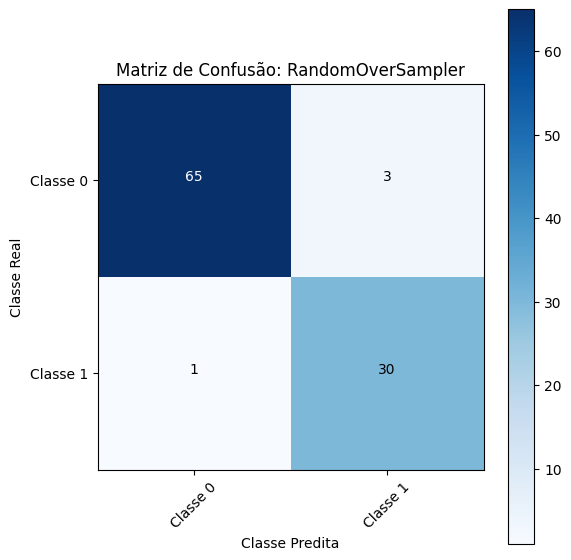

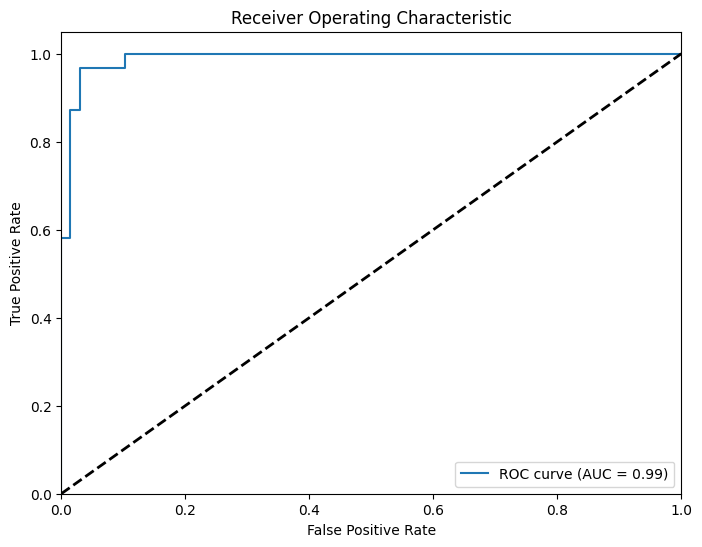

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Divisão dos dados antes do oversampling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

# Aplicar RandomOverSampling ou SMOTE
# Escolha o método de oversampling:
oversampler = RandomOverSampler(random_state=42)
#oversampler = SMOTE(random_state=42)

# Aplicar oversampling nos dados de treino
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Configurar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo com dados balanceados
rf_model.fit(X_train_resampled, y_train_resampled)

# Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar as métricas no conjunto de teste
metrics = {
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
}

metrics_df = pd.DataFrame(metrics, index=["Value"])

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring="accuracy")

# Exibir a tabela com métricas
print("Cross Validation Scores:", cv_scores)
print(f"Cross Validation Mean Accuracy: {np.mean(cv_scores):.4f}")

# Relatório de Classificação por Classe
print("Relatório de Classificação por Classe:")
print(classification_report(y_test, y_pred))

# Plotar matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: RandomOverSampler')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Plotar a curva ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## RANDOM UNDER SAMPLER

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Relatório de Classificação por Classe:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        68
           1       0.79      0.97      0.87        31

    accuracy                           0.91        99
   macro avg       0.89      0.93      0.90        99
weighted avg       0.92      0.91      0.91        99



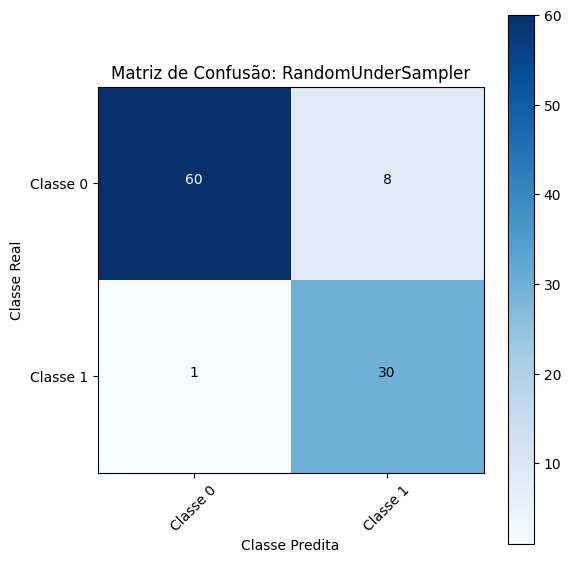

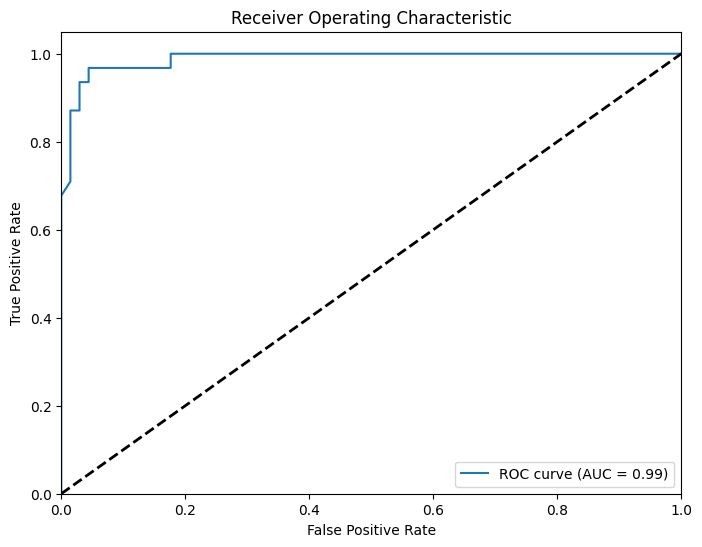

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Divisão dos dados antes do undersampling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

# Aplicar RandomUnderSampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Configurar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo com dados balanceados (undersampled)
rf_model.fit(X_train_resampled, y_train_resampled)

# Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar as métricas no conjunto de teste
print("Relatório de Classificação por Classe:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: RandomUnderSampler')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']  # Substitua pelos nomes das suas classes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Plotar a curva ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# standard scaler


### smote

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross Validation Scores: [0.87777778 0.91111111 0.86666667 0.88764045 0.95505618 0.91011236
 0.93258427 0.91011236 0.96629213 0.95505618]
Cross Validation Mean Accuracy: 0.9172

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.94      0.97      0.95        31

    accuracy                           0.97        99
   macro avg       0.96      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99


Tabela de Métricas:
       F1 Score  Precision  Recall  Accuracy
Value     0.952      0.938   0.968     0.970


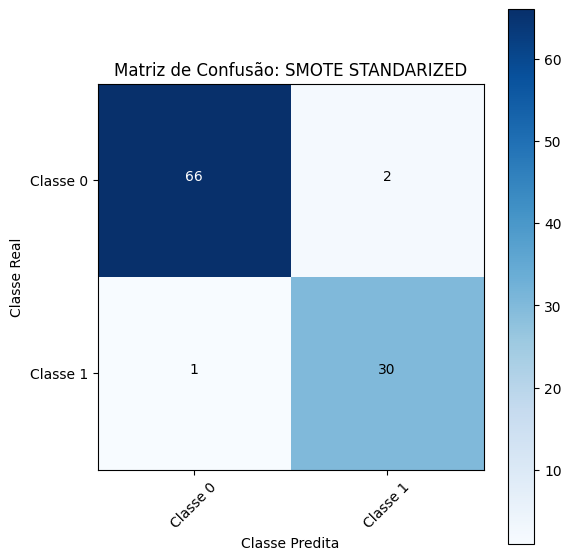

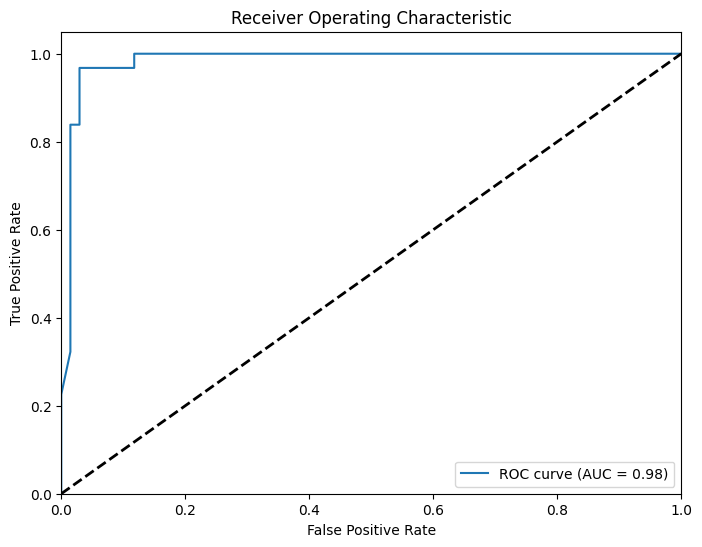

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Padronizar os dados com StandardScaler
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=selected_features)

# Divisão em treino, validação e teste (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_standardized, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

# Aplicar oversampling (escolha o método: SMOTE ou RandomOverSampler)
# oversampler = RandomOverSampler(random_state=42)
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Configurar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo com dados balanceados
rf_model.fit(X_train_resampled, y_train_resampled)

# Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar as métricas no conjunto de teste
metrics = {
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
}

metrics_df = pd.DataFrame(metrics, index=["Value"])

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_standardized, y, cv=cv, scoring="accuracy")

# Mostrar resultados
print("Cross Validation Scores:", cv_scores)
print(f"Cross Validation Mean Accuracy: {np.mean(cv_scores):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nTabela de Métricas:")
print(metrics_df)

# Plotar matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: SMOTE STANDARIZED')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Plotar a curva ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Random Over Sampler

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Cross Validation Scores: [0.87777778 0.91111111 0.86666667 0.88764045 0.95505618 0.91011236
 0.93258427 0.91011236 0.96629213 0.95505618]
Cross Validation Mean Accuracy: 0.9172

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.91      0.97      0.94        31

    accuracy                           0.96        99
   macro avg       0.95      0.96      0.95        99
weighted avg       0.96      0.96      0.96        99


Tabela de Métricas:
       F1 Score  Precision  Recall  Accuracy
Value     0.938      0.909   0.968     0.960


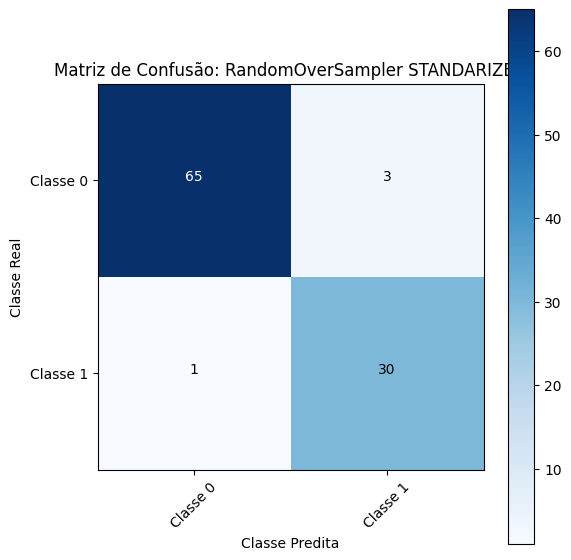

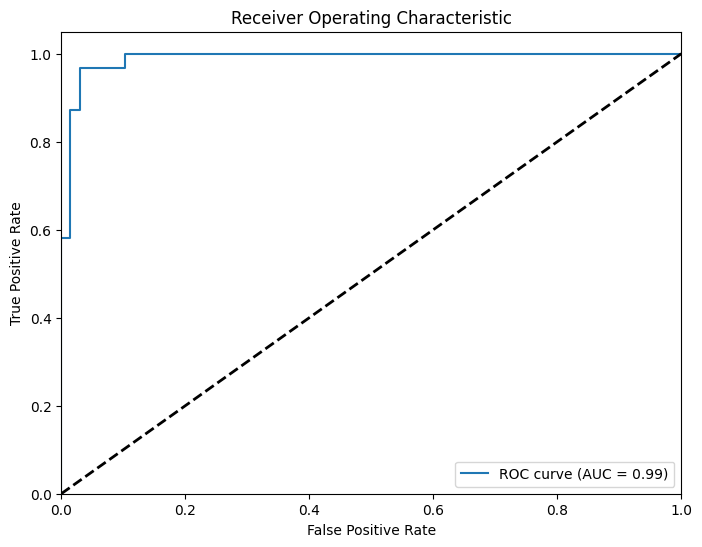

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Padronizar os dados com StandardScaler
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=selected_features)

# Divisão em treino, validação e teste (78%, 12%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_standardized, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

# Aplicar oversampling (escolha o método: SMOTE ou RandomOverSampler)
oversampler = RandomOverSampler(random_state=42)
#oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Configurar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo com dados balanceados
rf_model.fit(X_train_resampled, y_train_resampled)

# Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar as métricas no conjunto de teste
metrics = {
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
}

metrics_df = pd.DataFrame(metrics, index=["Value"])

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_standardized, y, cv=cv, scoring="accuracy")

# Mostrar resultados
print("Cross Validation Scores:", cv_scores)
print(f"Cross Validation Mean Accuracy: {np.mean(cv_scores):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nTabela de Métricas:")
print(metrics_df)

# Plotar matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: RandomOverSampler STANDARIZED')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Plotar a curva ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# UNDERSAMPLER

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Cross Validation Scores: [0.88268156 0.92178771 0.93854749 0.91573034 0.93258427]
Cross Validation Mean Accuracy: 0.9183

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        68
           1       0.79      0.97      0.87        31

    accuracy                           0.91        99
   macro avg       0.89      0.93      0.90        99
weighted avg       0.92      0.91      0.91        99


Tabela de Métricas:
       F1 Score  Precision  Recall  Accuracy
Value     0.870      0.789   0.968     0.909


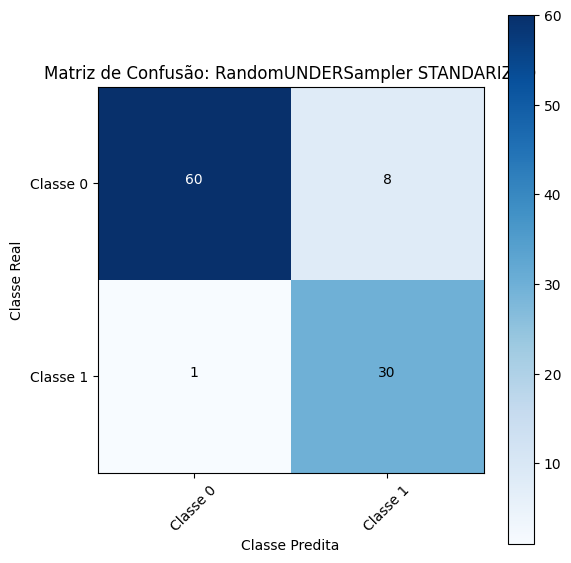

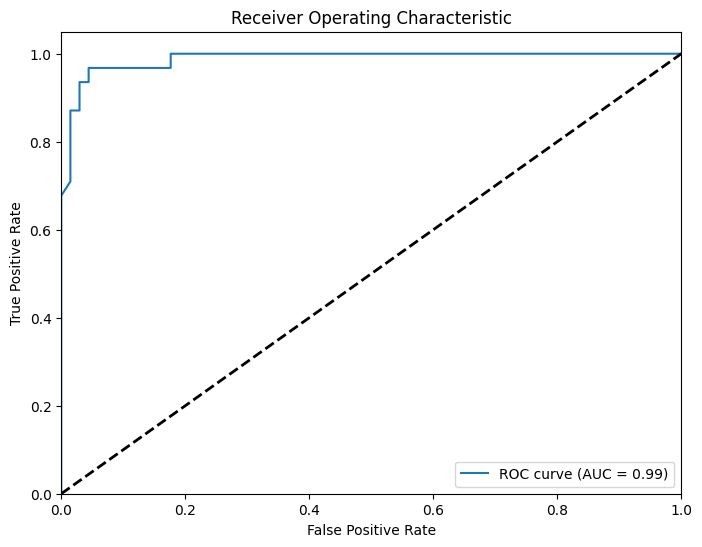

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Padronizar os dados com StandardScaler
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=selected_features)

# Divisão em treino, validação e teste (80%, 10%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_standardized, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

# Aplicar oversampling (escolha o método: SMOTE ou RandomOverSampler)
undersampler = RandomUnderSampler(random_state=42)
#oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Configurar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo com dados balanceados
rf_model.fit(X_train_resampled, y_train_resampled)

# Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar as métricas no conjunto de teste
metrics = {
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
}

metrics_df = pd.DataFrame(metrics, index=["Value"])

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_standardized, y, cv=cv, scoring="accuracy")

# Mostrar resultados
print("Cross Validation Scores:", cv_scores)
print(f"Cross Validation Mean Accuracy: {np.mean(cv_scores):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nTabela de Métricas:")
print(metrics_df)

# Plotar matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: RandomUNDERSampler STANDARIZED')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Plotar a curva ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## smoteenn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        68
           1       0.82      1.00      0.90        31

    accuracy                           0.93        99
   macro avg       0.91      0.95      0.92        99
weighted avg       0.94      0.93      0.93        99



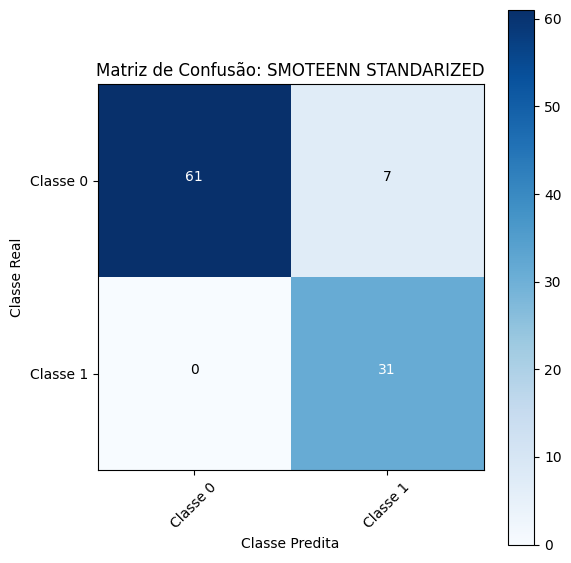

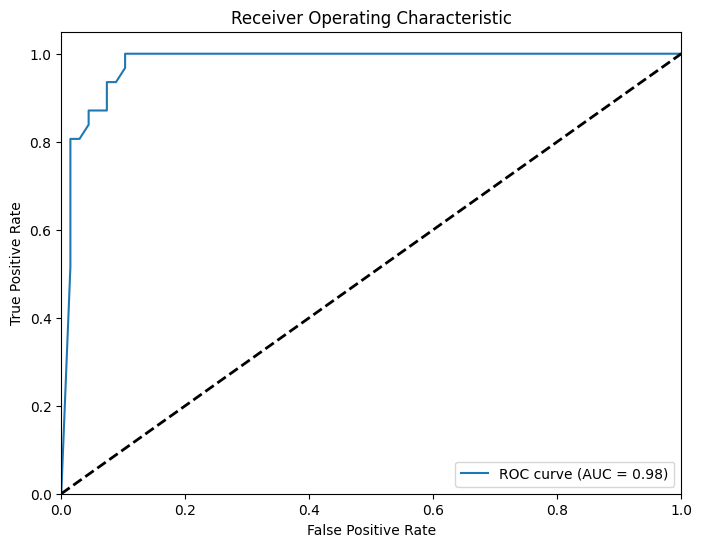

In [45]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Padronizar os dados com StandardScaler
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=selected_features)

# Divisão em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X_standardized, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

# Aplicar SMOTEENN para balanceamento
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar as métricas no conjunto de teste
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: SMOTEENN STANDARIZED')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']  # Substitua pelos nomes das suas classes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Curva ROC AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# TUNING HIPERPARÂMETROS

In [46]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [65]:
# Defina a proporção de importância
Peso_FN = 1  # Importância relativa de minimizar falsos negativos
Peso_FP = 5  # Importância relativa de minimizar falsos positivos

def calcular_custo_ponderado(y_true, y_pred):
  """Calcula o custo ponderado com base na matriz de confusão e na proporção."""
  cm = confusion_matrix(y_true, y_pred)
  FP = cm[0, 1]  # Falsos positivos (classe 0 prevista como 1)
  FN = cm[1, 0]  # Falsos negativos (classe 1 prevista como 0)
  return (FP * Peso_FP) + (FN * Peso_FN)

[I 2024-12-23 12:27:43,203] A new study created in memory with name: no-name-b920027f-c79a-4602-b701-8ab0375fa1f3


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2024-12-23 12:27:56,162] Trial 0 finished with value: 53.2 and parameters: {'max_depth': 18, 'n_estimators': 350, 'criterion': 'log_loss', 'min_samples_leaf': 4, 'min_samples_split': 2, 'max_features': 'sqrt', 'random_state': 42, 'class_weight': 'balanced', 'bootstrap': True}. Best is trial 0 with value: 53.2.
[I 2024-12-23 12:28:03,714] Trial 1 finished with value: 39.8 and parameters: {'max_depth': 8, 'n_estimators': 450, 'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 4, 'max_features': 'log2', 'random_state': 42, 'class_weight': None, 'bootstrap': False}. Best is trial 1 with value: 39.8.
[I 2024-12-23 12:28:07,342] Trial 2 finished with value: 43.6 and parameters: {'max_depth': 18, 'n_estimators': 200, 'criterion': 'log_loss', 'min_samples_leaf': 2, 'min_samples_split': 4, 'max_features': 'sqrt', 'random_state': 42, 'class_weight': 'balanced', 'bootstrap': True}. Best is trial 1 with value: 39.8.
[I 2024-12-23 12:28:13,446] Trial 3 finished with value: 39.4 and

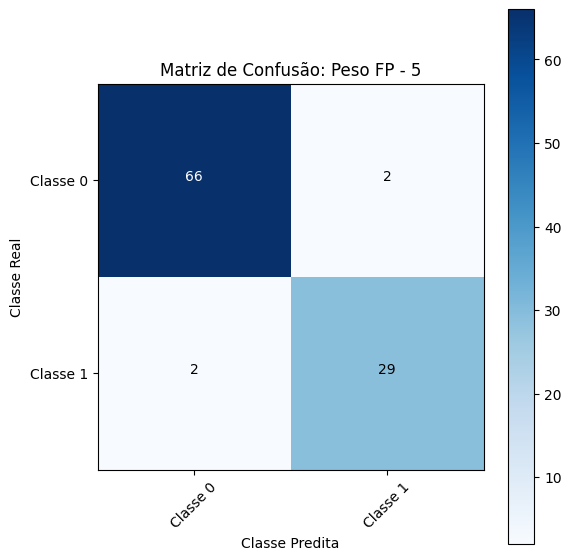

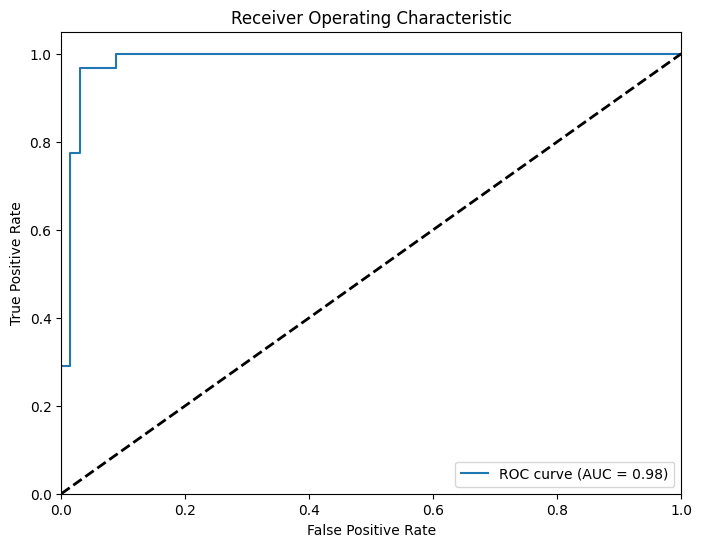

,UF,Município,Nome do manancial superficial,Date_x,Unidade,Resultado,DBO,Clorofila,SolDissolvidosTotais,Nitratos,NitrogenioAmoniacal,Classe Real,Classe Predita
471,BA,MANSIDAO,RIO PRETO,2019-11-04,Aphanocapsa sp.,0.000,3.200,4.306,73.000,0.920,0.300,0,1
600,CE,ARNEIROZ,RIO JAGUARIBE,2018-11-05,Aphanocapsa sp.,3395.000,9.300,52.800,1134.000,0.500,0.700,0,1
717,BA,PALMEIRAS,RIO PRETO,2018-03-13,Aphanocapsa sp.,56160.000,3.405,0.800,33.000,0.580,0.330,1,0
733,CE,JAGUARETAMA,JAGUARIBE,2018-03-08,Aphanocapsa sp.,751989.000,4.100,7.500,172.000,2.300,1.100,1,0


In [64]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Divisão em treino, validação e teste (75%, 15%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

def objective(trial):
    # Definir os hiperparâmetros para otimização
    max_depth = trial.suggest_int("max_depth", 8, 20, step=1)
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=50)
    criterion = trial.suggest_categorical('criterion', ['log_loss', 'entropy', 'gini'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4, step=1)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 9, step=1)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    random_state = trial.suggest_categorical('random_state', [42])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    bootstrap=trial.suggest_categorical('bootstrap', [False, True])

    # Configurar o modelo com os hiperparâmetros
    rf_model = RandomForestClassifier(
        bootstrap=bootstrap,
        max_features=max_features,
        max_depth=max_depth,
        n_estimators=n_estimators,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        min_samples_split=min_samples_split,
        random_state=random_state,
        class_weight=class_weight,
        n_jobs=-1
    )

    # Validação cruzada
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    custos_ponderados = []

    for train_index, val_index in skf.split(X_train, y_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

        rf_model.fit(X_fold_train, y_fold_train)
        y_pred = rf_model.predict(X_fold_val)

        # Calcular o custo ponderado
        custo_ponderado = calcular_custo_ponderado(y_fold_val, y_pred)
        custos_ponderados.append(custo_ponderado)

    # Retornar a média dos F1-Scores weighted
    return np.mean(custos_ponderados)

# Criar o estudo Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200, show_progress_bar=True)

# Melhor hiperparâmetro encontrado
best_params = study.best_params
print("Melhores parâmetros:", best_params)

# Avaliar o modelo no conjunto de teste
rf_model = RandomForestClassifier(
    bootstrap=best_params['bootstrap'],
    max_features=best_params['max_features'],
    max_depth=best_params["max_depth"],
    n_estimators=best_params["n_estimators"],
    random_state=42,
    min_samples_leaf=best_params['min_samples_leaf'],
    criterion=best_params['criterion'],
    min_samples_split=best_params['min_samples_split'],
    class_weight=best_params['class_weight']
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Avaliar métricas
metrics = {
    "F1 Score": f1_score(y_test, y_pred, pos_label=1),
    "Precision": precision_score(y_test, y_pred, pos_label=1),
    "Recall": recall_score(y_test, y_pred, pos_label=1),
    "Accuracy": accuracy_score(y_test, y_pred),
}
metrics_df = pd.DataFrame(metrics, index=["Value"])
print("\nTabela de Métricas:")
print(metrics_df)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão: Peso FP - {Peso_FP}')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Curva ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

erros = X_test.copy()
erros['Classe Real'] = y_test
erros['Classe Predita'] = y_pred
erros_incorretos = erros[erros['Classe Real'] != erros['Classe Predita']]
# Adicionar as colunas do DataFrame original ao DataFrame de erros
erros_incorretos = df_aphanocapsa_0e1[['UF', 'Município', 'Nome do manancial superficial', 'Date_x', 'Unidade', 'Resultado']].merge(
    erros_incorretos,
    left_index=True,  # Usar o índice do DataFrame de erros
    right_index=True  # Usar o índice do DataFrame original
)

# Exibir o DataFrame atualizado com as colunas adicionais
erros_incorretos

# **ÚLTIMA PARTE**


Tabela de Métricas:
       F1 Score  Precision  Recall  Accuracy
Value     0.952      0.938   0.968     0.970


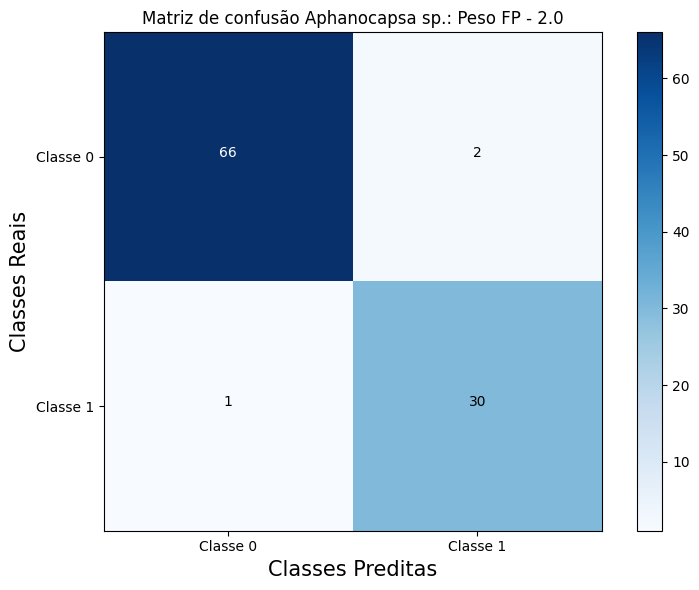

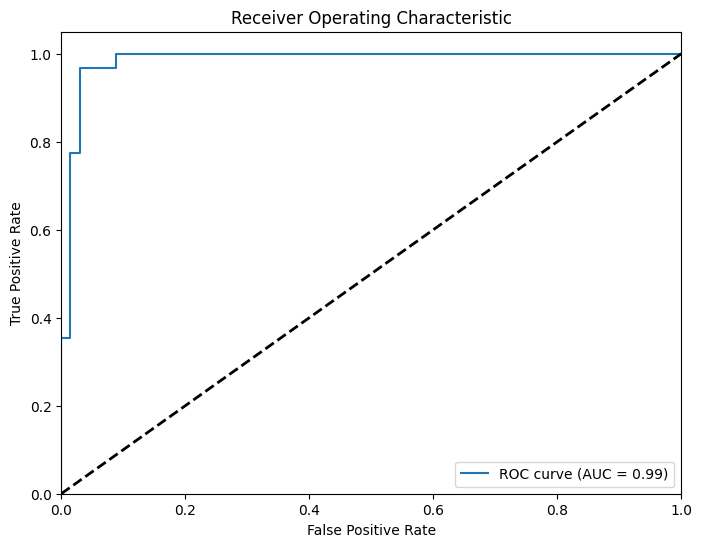

,UF,Município,Nome do manancial superficial,Date_x,Unidade,Resultado,DBO,Clorofila,SolDissolvidosTotais,Nitratos,NitrogenioAmoniacal,Classe Real,Classe Predita
471,BA,MANSIDAO,RIO PRETO,2019-11-04,Aphanocapsa sp.,0.000,3.200,4.306,73.000,0.920,0.300,0,1
600,CE,ARNEIROZ,RIO JAGUARIBE,2018-11-05,Aphanocapsa sp.,3395.000,9.300,52.800,1134.000,0.500,0.700,0,1
717,BA,PALMEIRAS,RIO PRETO,2018-03-13,Aphanocapsa sp.,56160.000,3.405,0.800,33.000,0.580,0.330,1,0


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Features selecionadas e target
selected_features = ['DBO', 'Clorofila', 'SolDissolvidosTotais', 'Nitratos', 'NitrogenioAmoniacal']
X = df_aphanocapsa_0e1[selected_features]
y = df_aphanocapsa_0e1['Classe']

# Divisão em treino e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.21, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-(0.1/0.21), stratify=y_temp, random_state=42)

# Treinar o modelo RandomForest com hiperparâmetros padrão (sem padronização e sem undersampling)
rf_model = RandomForestClassifier(
           n_jobs=-1,
           bootstrap=False,
           max_features='sqrt',
           max_depth=20,
           n_estimators=100,
           min_samples_leaf=2,
           min_samples_split=9,
           criterion='log_loss',
           random_state=42)
rf_model.fit(X_train, y_train) # Treinando com os dados crus, sem pré-processamento

# Previsão no conjunto de teste
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Avaliar métricas
metrics = {
    "F1 Score": f1_score(y_test, y_pred, pos_label=1),
    "Precision": precision_score(y_test, y_pred, pos_label=1),
    "Recall": recall_score(y_test, y_pred, pos_label=1),
    "Accuracy": accuracy_score(y_test, y_pred)
}
metrics_df = pd.DataFrame(metrics, index=["Value"])
print("\nTabela de Métricas:")
print(metrics_df)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Matriz de confusão Aphanocapsa sp.: Peso FP - 2.0')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classes Reais', fontsize=15)
plt.xlabel('Classes Preditas', fontsize=15)
plt.tight_layout()
plt.show()

# Curva ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

erros = X_test.copy()
erros['Classe Real'] = y_test
erros['Classe Predita'] = y_pred
erros_incorretos = erros[erros['Classe Real'] != erros['Classe Predita']]
# Adicionar as colunas do DataFrame original ao DataFrame de erros
erros_incorretos = df_aphanocapsa_0e1[['UF', 'Município', 'Nome do manancial superficial', 'Date_x', 'Unidade', 'Resultado']].merge(
    erros_incorretos,
    left_index=True,  # Usar o índice do DataFrame de erros
    right_index=True  # Usar o índice do DataFrame original
)

# Exibir o DataFrame atualizado com as colunas adicionais
erros_incorretos